*Hello! Welcome to my inaugural Exploratory Data Analysis (EDA) project, where I explore the Titanic dataset to gain insights into the factors that influenced passenger survival. Through visualizations and statistical analysis, I aim to reveal key trends and relationships within the data, setting the stage for further predictive modeling efforts.italicised text*

*We all have imported all the required and inuse libraries to perform EDA*

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [203]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

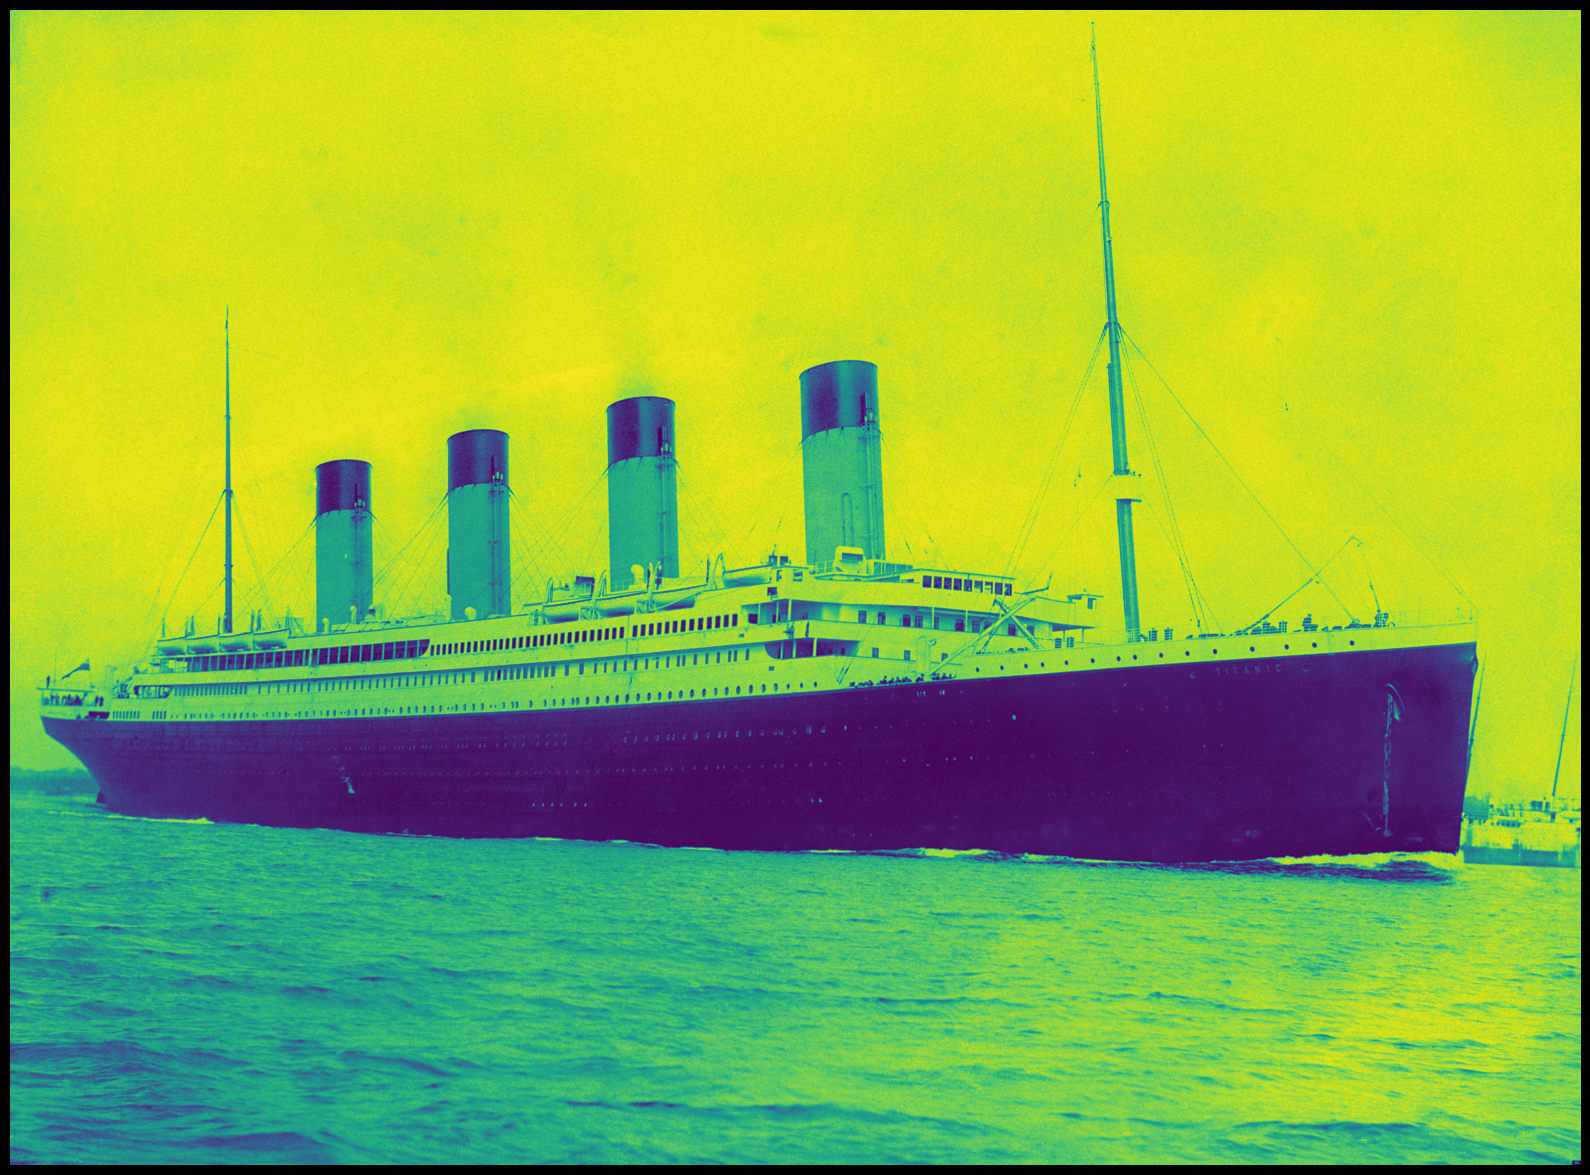

In [204]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the Titanic image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg'

try:
    # Define headers with user-agent
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    # Fetch the image from the URL with headers
    response = requests.get(image_url, headers=headers)
    response.raise_for_status()  # Check if the request was successful

    # Verify the content type
    content_type = response.headers['Content-Type']
    if 'image' not in content_type:
        raise ValueError(f"URL does not point to an image. Content-Type: {content_type}")

    # Open the image
    img = Image.open(BytesIO(response.content))

    # Display the image using matplotlib with a larger size
    plt.figure(figsize=(30, 15))  # Adjust the figure size as needed
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error fetching the image: {e}")
except ValueError as ve:
    print(ve)
except Image.UnidentifiedImageError:
    print("Error: The URL does not contain a valid image.")


*Now we import Titanic Dataset from kaggle.we have two Data sets but for now we import only import one Dataset which have almost all the details required in performing EDA we will import 2nd Data set incase we need for more Analysis.*

In [205]:
df = pd.read_csv('/content/drive/MyDrive/Titanic 1.csv',index_col='PassengerId')

*We have checked the head of the Data to check What actually kind of columns and information we have so that we can plan how and what actually insights can get through*

In [206]:
df.head(30)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28                  0       1   
29                  1       3   
30                  0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
11                             Sandstrom, Miss. Marguerite Rut  female   4.0   
12                                    Bonnell, Miss. Elizabeth  female  58.0   
13                              Saundercock, Mr. William Henry    male  20.0   
14                                 Andersson, Mr. Anders Johan    male  39.0   
15                        Vestrom, Miss. Hulda Amanda Adolfina  female  14.0   
16                            Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
17                                        Rice, Master. Eugene    male   2.0   
18                                Williams, Mr. Charles Eugene    male   NaN   
19           Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
20                                     Masselmani, Mrs. Fatima  female   NaN   
21                                        Fynney, Mr. Joseph J    male  35.0   
22                                       Beesley, Mr. Lawrence    male  34.0   
23                                 McGowan, Miss. Anna "Annie"  female  15.0   
24                                Sloper, Mr. William Thompson    male  28.0   
25                               Palsson, Miss. Torborg Danira  female   8.0   
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
27                                     Emir, Mr. Farred Chehab    male   NaN   
28                              Fortune, Mr. Charles Alexander    male  19.0   
29                               O'Dwyer, Miss. Ellen "Nellie"  female   NaN   
30                                         Todoroff, Mr. Lalio    male   NaN   

             SibSp  Parch            Ticket      Fare        Cabin Embarked  
PassengerId                                                                  
1                1      0         A/5 21171    7.2500          NaN        S  
2                1      0          PC 17599   71.2833          C85        C  
3                0      0  STON/O2. 3101282    7.9250          NaN        S  
4    

*This the random check of Data*

In [207]:
df.sample(30)

Survived  Pclass  \
PassengerId                     
578                 1       1   
94                  0       3   
658                 0       3   
369                 1       3   
515                 0       3   
505                 1       1   
669                 0       3   
600                 1       1   
107                 1       3   
311                 1       1   
33                  1       3   
129                 1       3   
601                 1       2   
115                 0       3   
60                  0       3   
337                 0       1   
864                 0       3   
848                 0       3   
589                 0       3   
43                  0       3   
487                 1       1   
564                 0       3   
99                  1       2   
764                 1       1   
378                 0       1   
10                  1       2   
555                 1       3   
659                 0       2   
525                 0       3   
276                 1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
578                  Silvey, Mrs. William Baird (Alice Munger)  female  39.0   
94                                     Dean, Mr. Bertram Frank    male  26.0   
658                              Bourke, Mrs. John (Catherine)  female  32.0   
369                                        Jermyn, Miss. Annie  female   NaN   
515                                          Coleff, Mr. Satio    male  24.0   
505                                      Maioni, Miss. Roberta  female  16.0   
669                                            Cook, Mr. Jacob    male  43.0   
600               Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    male  49.0   
107                           Salkjelsvik, Miss. Anna Kristine  female  21.0   
311                             Hays, Miss. Margaret Bechstein  female  24.0   
33                                    Glynn, Miss. Mary Agatha  female   NaN   
129                                          Peter, Miss. Anna  female   NaN   
601          Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...  female  24.0   
115                                      Attalah, Miss. Malake  female  17.0   
60                          Goodwin, Master. William Frederick    male  11.0   
337                                  Pears, Mr. Thomas Clinton    male  29.0   
864                          Sage, Miss. Dorothy Edith "Dolly"  female   NaN   
848                                         Markoff, Mr. Marin    male  35.0   
589                                      Gilinski, Mr. Eliezer    male  22.0   
43                                         Kraeff, Mr. Theodor    male   NaN   
487            Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)  female  35.0   
564                                          Simmons, Mr. John    male   NaN   
99                        Doling, Mrs. John T (Ada Julia Bone)  female  34.0   
764                  Carter, Mrs. William Ernest (Lucile Polk)  female  36.0   
378                                  Widener, Mr. Harry Elkins    male  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
555                                         Ohman, Miss. Velin  female  22.0   
659                               Eitemiller, Mr. George Floyd    male  23.0   
525                                          Kassem, Mr. Fared    male   NaN   
276                          Andrews, Miss. Kornelia Theodosia  female  63.0   

             SibSp  Parch           Ticket      Fare    Cabin Embarked  
PassengerId                                                             
578              1      0            13507   55.9000      E44        S  
94               1      2        C.A. 2315   20.5750      NaN        S  
658              1      1           364849   15.5000      NaN        Q  
369              0      0     

In [208]:
df.tail()

Survived  Pclass                                      Name  \
PassengerId                                                               
887                 0       2                     Montvila, Rev. Juozas   
888                 1       1              Graham, Miss. Margaret Edith   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"   
890                 1       1                     Behr, Mr. Karl Howell   
891                 0       3                       Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
PassengerId                                                                
887            male  27.0      0      0      211536  13.00   NaN        S  
888          female  19.0      0      0      112053  30.00   B42        S  
889          female   NaN      1      2  W./C. 6607  23.45   NaN        S  
890            male  26.0      0      0      111369  30.00  C148        C  
891            male  32.0      0      0      370376   7.75   NaN        Q



1. The "Survived" column in the Titanic dataset indicates whether a passenger survived the disaster. It is a binary variable with the following values:
*   0: The passenger did not survive.
*   1: The passenger survived.
By analyzing this column, we can determine the number of passengers who lived through the tragedy, as well as the number who did not.


2. The "Pclass" column in the Titanic dataset represents the passenger's class, indicating their socioeconomic status on the ship. It is a categorical variable with three possible values:
*  1: First class (upper class)
*  2: Second class (middle class)
*  3: Third class (lower class)


3.  Analyzing this column helps us understand the distribution of passengers across different classes and how class status may have influenced survival rates.


4. The "Name" column in the Titanic dataset contains the full names of the p
assengers. This column is a string variable and includes titles and, occasionally, familial relationships. Analyzing the names can provide insights into passengers' social status, family groups, and other personal details.


5. The "Sex" column in the Titanic dataset denotes the gender of each passenger. It is a categorical variable with two possible values:
* male: The passenger is male.
* female: The passenger is female.


6. The "Age" column in the Titanic dataset represents the age of each passenger. This column is a numerical variable and includes ages ranging from infants to elderly passengers. Some entries may contain missing values.
Analyzing the "Age" column allows us to understand the age distribution of passengers and examine how age may have influenced survival rates.


7.  'SibSp', 'Parch',
The "SibSp" column indicates the number of siblings or spouses a passenger had on the Titanic. It is a numerical variable with values.

* 0: No siblings or spouses aboard.
* 1 or more: One or more siblings or spouses aboard.

The "Parch" column represents the number of parents or children a passenger had on the Titanic. This numerical variable includes values from:

*  0: No parents or children aboard.
*  1 or more: One or more parents or children aboard.

8. To explain the "Ticket" column in the Titanic dataset, you can describe it as follows.The "Ticket" column in the Titanic dataset contains the ticket number for each passenger. This column is a categorical variable that includes a mix of alphanumeric characters. Ticket numbers can vary in format and length, reflecting different ticketing systems used at the time.Analyzing the "Ticket" column can help us understand more about the ticketing process and patterns, although it may not directly influence survival rates.
* Purely numeric values (e.g., "350406")
* Alphanumeric combinations (e.g., "PC 17599")
While the "Ticket" column may not directly affect survival rates, it can be useful for identifying patterns related to ticketing practices, potential groupings of passengers who traveled together, and the socio-economic background based on the ticket class. Analyzing this column can offer additional context to our overall understanding of the passengers on the Titanic.

9. The "Fare" column in the Titanic dataset represents the amount of money paid for the passenger's ticket. This column is a numerical variable that indicates the price of the ticket in the currency of the time period. The fare values vary based on factors such as ticket class, cabin type, and any additional services provided.Analyzing the "Fare" column helps us understand the distribution of ticket prices among passengers and explore correlations between fare prices and other variables, such as survival rates or socio-economic status.
* Ticket class (first, second, or third class)
* Cabin type (e.g., deluxe cabins or shared accommodations)
* Additional services or amenities provided during the voyage
By examining this column, we can analyze the distribution of ticket prices among passengers and investigate correlations with other variables. For instance, we may explore whether passengers who paid higher fares had better survival rates or if there were disparities in fare prices based on socio-economic status. This analysis can provide valuable insights into the passenger demographics and the ticketing structure of the Titanic.

10. Analyzing the "Cabin" column can provide insights into the spatial distribution of passengers across different areas of the ship and may reveal correlations with survival rates, although the missing values limit the completeness of the analysis

11. The "Embarked" column in the Titanic dataset indicates the port of embarkation for each passenger. It is a categorical variable with three possible values:
* C: Cherbourg
* Q: Queenstown
* S: Southampton
By examining this column, we can investigate the distribution of passengers across the different embarkation ports and explore whether there are any correlations with other variables. For instance, we might analyze whether passengers from certain ports tended to belong to specific socio-economic groups or if there were differences in survival rates based on the port of embarkation. This analysis provides insights into the demographic composition of passengers and their boarding locations on the Titanic.



In [209]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*we have found that there are many null value present in Data in 'age' column*

 columns Types
1. numerical :- age,fare,passenger_id
2. categorical colulumns :- survived,pclass,sex,Sibsp,Parch,Embarked
3. mixed :- Name,Ticket,Cabin.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Counted the sum of null values.null values are filled are not it depends on futhur Analysis requirements.

In [211]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Going through we are checking the possiblities of outliers analysing min,max,std,percentile

In [212]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Age

###Conclusion
Hence skew value is near by 0 (0.38910778230082704) so this will consider as Normal distribution.
20% values are missing.
Visualization showing some outliers but we found it valid values in Data.

In [213]:
df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [214]:
df['Age'].isnull().sum()

177

In [215]:
df['Age'].isnull().sum()/len(df['Age'])


0.19865319865319866

<Axes: ylabel='Frequency'>

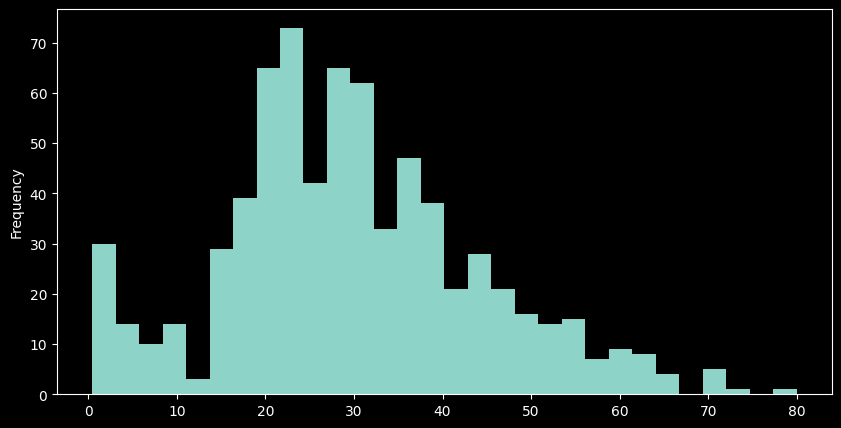

In [216]:
plt.figure(figsize=(10,5))
df['Age'].plot(kind = "hist",bins=30)

0.38910778230082704

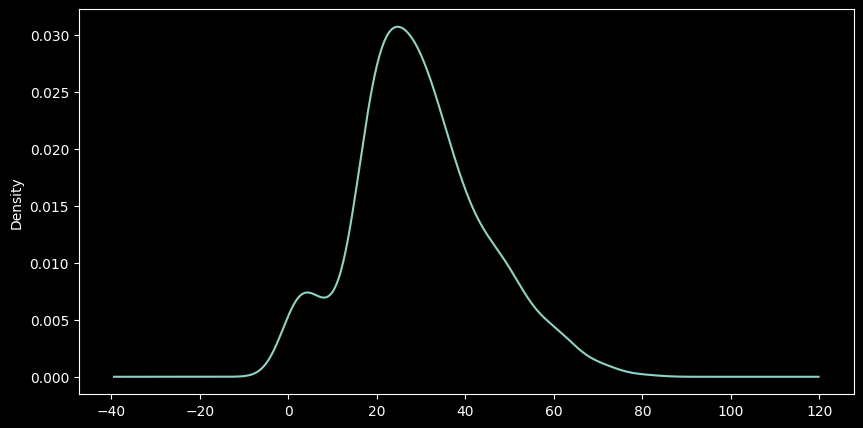

In [217]:
plt.figure(figsize=(10,5))
df['Age'].plot(kind= 'kde')
df['Age'].skew()

Box plot showing some outliersabove approx 65 year but after anlysing age column 80 years is valid age data.

Survived  Pclass                                  Name   Sex  \
PassengerId                                                                 
34                  0       2                 Wheadon, Mr. Edward H  male   
97                  0       1             Goldschmidt, Mr. George B  male   
117                 0       3                  Connors, Mr. Patrick  male   
494                 0       1               Artagaveytia, Mr. Ramon  male   
631                 1       1  Barkworth, Mr. Algernon Henry Wilson  male   
673                 0       2           Mitchell, Mr. Henry Michael  male   
746                 0       1          Crosby, Capt. Edward Gifford  male   
852                 0       3                   Svensson, Mr. Johan  male   

              Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
PassengerId                                                          
34           66.0      0      0  C.A. 24579  10.5000   NaN        S  
97           71.0      0      0    PC 17754  34.6542    A5        C  
117          70.5      0      0      370369   7.7500   NaN        Q  
494          71.0      0      0    PC 17609  49.5042   NaN        C  
631          80.0      0      0       27042  30.0000   A23        S  
673          70.0      0      0  C.A. 24580  10.5000   NaN        S  
746          70.0      1      1   WE/P 5735  71.0000   B22        S  
852          74.0      0      0      347060   7.7750   NaN        S

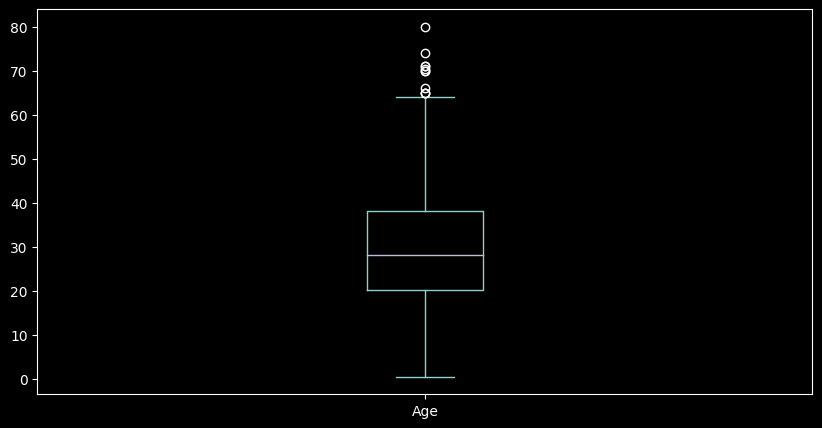

In [218]:
plt.figure(figsize=(10,5))
df['Age'].plot(kind ='box')
df[df['Age']>65]

#Fare

###Conclusion
* Highly positively skewed
* min is 0 it  means more than 15 passengers are travelling free.
* max is 512 it means only 3 passengers are travelling paying high amount.
* Becuase of free and maximum paying amount hist plot showing many outliers but
  after validating it is valid Data because they were travelling alone in pclass 1.
* We found that many of passengers travelling on same ticket number hence they
  are the fmily members.
* Addition of Column SibSp (Siblings) and Parch (Parent with child) are total
  family size.
* Feature Engineering [indivisuals_fare] by importing titanic2 Dataset.


In [219]:
df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [220]:
df[df['Fare'] ==0].head(20)

Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Ennis Hastings  male   NaN   
733                 0       2              Knight, Mr. Robert J  male   NaN   
807                 0       1            Andrews, Mr. Thomas Jr  male  39.0   
816                 0       1                  Fry, Mr. Richard  male   NaN   
823                 0       1   Reuchlin, Jonkheer. John George  male  38.0   

             SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                             
180              0      0    LINE   0.0   NaN        S  
264              0      0  112059   0.0   B94        S  
272              0      0    LINE   0.0   NaN        S  
278              0      0  239853   0.0   NaN        S  
303              0      0    LINE   0.0   NaN        S  
414              0      0  239853   0.0   NaN        S  
467              0      0  239853   0.0   NaN        S  
482              0      0  239854   0.0   NaN        S  
598              0      0    LINE   0.0   NaN        S  
634              0      0  112052   0.0   NaN        S  
675              0      0  239856   0.0   NaN        S  
733              0      0  239855   0.0   NaN        S  
807              0      0  112050   0.0   A36        S  
816              0      0  112058   0.0  B102        S  
823              0      0   19972   0.0   NaN        S

In [221]:
df[df['Fare'] >=512].head(5)

Survived  Pclass                                Name     Sex  \
PassengerId                                                                 
259                 1       1                    Ward, Miss. Anna  female   
680                 1       1  Cardeza, Mr. Thomas Drake Martinez    male   
738                 1       1              Lesurer, Mr. Gustave J    male   

              Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
PassengerId                                                                
259          35.0      0      0  PC 17755  512.3292          NaN        C  
680          36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
738          35.0      0      0  PC 17755  512.3292         B101        C

In [222]:
df[df['Fare'] >=512].head(5)

Survived  Pclass                                Name     Sex  \
PassengerId                                                                 
259                 1       1                    Ward, Miss. Anna  female   
680                 1       1  Cardeza, Mr. Thomas Drake Martinez    male   
738                 1       1              Lesurer, Mr. Gustave J    male   

              Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
PassengerId                                                                
259          35.0      0      0  PC 17755  512.3292          NaN        C  
680          36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
738          35.0      0      0  PC 17755  512.3292         B101        C

In [223]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [224]:
df['Fare'].isnull().sum()

0

In [225]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [226]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Passengers are travelling with 8 members of a family on single ticket.

we added the columns SibSp (siblings) and Parch (parents with Child) then we will get the total size of the family but in this Dataset total family members are travelling on single ticket, but we are getting the list of 8 members only.
now we have to import 2nd Dataset and concat both Datasets

In [227]:
df[df['SibSp']==8]

Survived  Pclass                               Name     Sex  Age  \
PassengerId                                                                     
160                 0       3         Sage, Master. Thomas Henry    male  NaN   
181                 0       3       Sage, Miss. Constance Gladys  female  NaN   
202                 0       3                Sage, Mr. Frederick    male  NaN   
325                 0       3           Sage, Mr. George John Jr    male  NaN   
793                 0       3            Sage, Miss. Stella Anna  female  NaN   
847                 0       3           Sage, Mr. Douglas Bullen    male  NaN   
864                 0       3  Sage, Miss. Dorothy Edith "Dolly"  female  NaN   

             SibSp  Parch    Ticket   Fare Cabin Embarked  
PassengerId                                                
160              8      2  CA. 2343  69.55   NaN        S  
181              8      2  CA. 2343  69.55   NaN        S  
202              8      2  CA. 2343  69.55   NaN        S  
325              8      2  CA. 2343  69.55   NaN        S  
793              8      2  CA. 2343  69.55   NaN        S  
847              8      2  CA. 2343  69.55   NaN        S  
864              8      2  CA. 2343  69.55   NaN        S

In [228]:
df1 = pd.read_csv('/content/drive/MyDrive/Titanic 2.csv')

In [229]:
df = pd.concat([df,df1])

In [230]:
df.head()

Survived  Pclass                                               Name  \
1       0.0       3                            Braund, Mr. Owen Harris   
2       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3       1.0       3                             Heikkinen, Miss. Laina   
4       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5       0.0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
1    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
2  female  38.0      1      0          PC 17599  71.2833   C85        C   
3  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
4  female  35.0      1      0            113803  53.1000  C123        S   
5    male  35.0      0      0            373450   8.0500   NaN        S   

   PassengerId  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN

Now we are getting desired result

In [231]:
df[df['SibSp']==8]

Survived  Pclass                               Name     Sex   Age  SibSp  \
160       0.0       3         Sage, Master. Thomas Henry    male   NaN      8   
181       0.0       3       Sage, Miss. Constance Gladys  female   NaN      8   
202       0.0       3                Sage, Mr. Frederick    male   NaN      8   
325       0.0       3           Sage, Mr. George John Jr    male   NaN      8   
793       0.0       3            Sage, Miss. Stella Anna  female   NaN      8   
847       0.0       3           Sage, Mr. Douglas Bullen    male   NaN      8   
864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
188       NaN       3                    Sage, Miss. Ada  female   NaN      8   
360       NaN       3        Sage, Master. William Henry    male  14.5      8   

     Parch    Ticket   Fare Cabin Embarked  PassengerId  
160      2  CA. 2343  69.55   NaN        S          NaN  
181      2  CA. 2343  69.55   NaN        S          NaN  
202      2  CA. 2343  69.55   NaN        S          NaN  
325      2  CA. 2343  69.55   NaN        S          NaN  
793      2  CA. 2343  69.55   NaN        S          NaN  
847      2  CA. 2343  69.55   NaN        S          NaN  
864      2  CA. 2343  69.55   NaN        S          NaN  
188      2  CA. 2343  69.55   NaN        S       1080.0  
360      2  CA. 2343  69.55   NaN        S       1252.0

In [232]:
df[df['Ticket']=='CA. 2343']

Survived  Pclass                               Name     Sex   Age  SibSp  \
160       0.0       3         Sage, Master. Thomas Henry    male   NaN      8   
181       0.0       3       Sage, Miss. Constance Gladys  female   NaN      8   
202       0.0       3                Sage, Mr. Frederick    male   NaN      8   
325       0.0       3           Sage, Mr. George John Jr    male   NaN      8   
793       0.0       3            Sage, Miss. Stella Anna  female   NaN      8   
847       0.0       3           Sage, Mr. Douglas Bullen    male   NaN      8   
864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
188       NaN       3                    Sage, Miss. Ada  female   NaN      8   
342       NaN       3              Sage, Mr. John George    male   NaN      1   
360       NaN       3        Sage, Master. William Henry    male  14.5      8   
365       NaN       3     Sage, Mrs. John (Annie Bullen)  female   NaN      1   

     Parch    Ticket   Fare Cabin Embarked  PassengerId  
160      2  CA. 2343  69.55   NaN        S          NaN  
181      2  CA. 2343  69.55   NaN        S          NaN  
202      2  CA. 2343  69.55   NaN        S          NaN  
325      2  CA. 2343  69.55   NaN        S          NaN  
793      2  CA. 2343  69.55   NaN        S          NaN  
847      2  CA. 2343  69.55   NaN        S          NaN  
864      2  CA. 2343  69.55   NaN        S          NaN  
188      2  CA. 2343  69.55   NaN        S       1080.0  
342      9  CA. 2343  69.55   NaN        S       1234.0  
360      2  CA. 2343  69.55   NaN        S       1252.0  
365      9  CA. 2343  69.55   NaN        S       1257.0

In [233]:
df['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [234]:
df[df['Ticket'] == 'CA 2144']

Survived  Pclass                                     Name     Sex   Age  \
60        0.0       3       Goodwin, Master. William Frederick    male  11.0   
72        0.0       3               Goodwin, Miss. Lillian Amy  female  16.0   
387       0.0       3          Goodwin, Master. Sidney Leonard    male   1.0   
481       0.0       3           Goodwin, Master. Harold Victor    male   9.0   
679       0.0       3  Goodwin, Mrs. Frederick (Augusta Tyler)  female  43.0   
684       0.0       3              Goodwin, Mr. Charles Edward    male  14.0   
139       NaN       3           Goodwin, Mr. Charles Frederick    male  40.0   
140       NaN       3              Goodwin, Miss. Jessie Allis  female  10.0   

     SibSp  Parch   Ticket  Fare Cabin Embarked  PassengerId  
60       5      2  CA 2144  46.9   NaN        S          NaN  
72       5      2  CA 2144  46.9   NaN        S          NaN  
387      5      2  CA 2144  46.9   NaN        S          NaN  
481      5      2  CA 2144  46.9   NaN        S          NaN  
679      1      6  CA 2144  46.9   NaN        S          NaN  
684      5      2  CA 2144  46.9   NaN        S          NaN  
139      1      6  CA 2144  46.9   NaN        S       1031.0  
140      5      2  CA 2144  46.9   NaN        S       1032.0

In [235]:
df['indivisual_fare']=df['Fare']/(df['SibSp']+df['Parch']+1)

In [236]:
df.head()

Survived  Pclass                                               Name  \
1       0.0       3                            Braund, Mr. Owen Harris   
2       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3       1.0       3                             Heikkinen, Miss. Laina   
4       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5       0.0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
1    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
2  female  38.0      1      0          PC 17599  71.2833   C85        C   
3  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
4  female  35.0      1      0            113803  53.1000  C123        S   
5    male  35.0      0      0            373450   8.0500   NaN        S   

   PassengerId  indivisual_fare  
1          NaN          3.62500  
2          NaN         35.64165  
3          NaN          7.92500  
4          NaN         26.55000  
5          NaN          8.05000

In [237]:
df['indivisual_fare'].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: indivisual_fare, dtype: float64

ON Fare column

In [238]:
df['indivisual_fare'].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: indivisual_fare, dtype: float64

In [239]:
df[['indivisual_fare','Fare']].describe()

indivisual_fare         Fare
count      1308.000000  1308.000000
mean         20.518215    33.295479
std          35.774337    51.758668
min           0.000000     0.000000
25%           7.452767     7.895800
50%           8.512483    14.454200
75%          24.237500    31.275000
max         512.329200   512.329200

<Axes: ylabel='Frequency'>

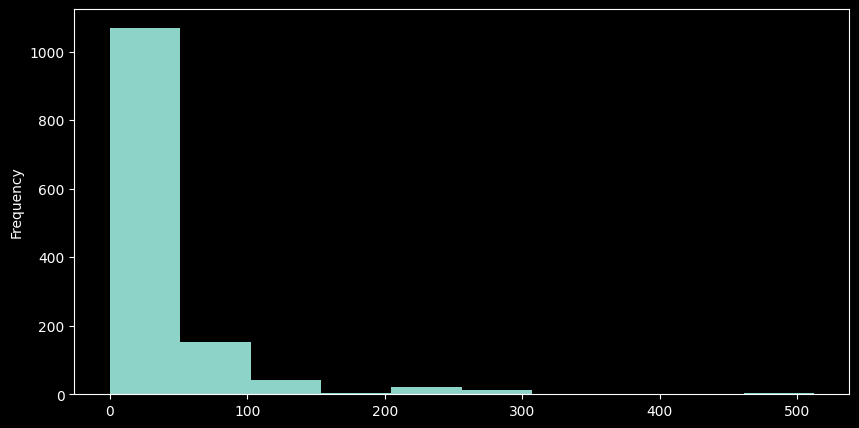

In [240]:
plt.figure(figsize=(10,5))
df['Fare'].plot(kind ='hist')

ON Indivisual_fare column

<Axes: ylabel='Frequency'>

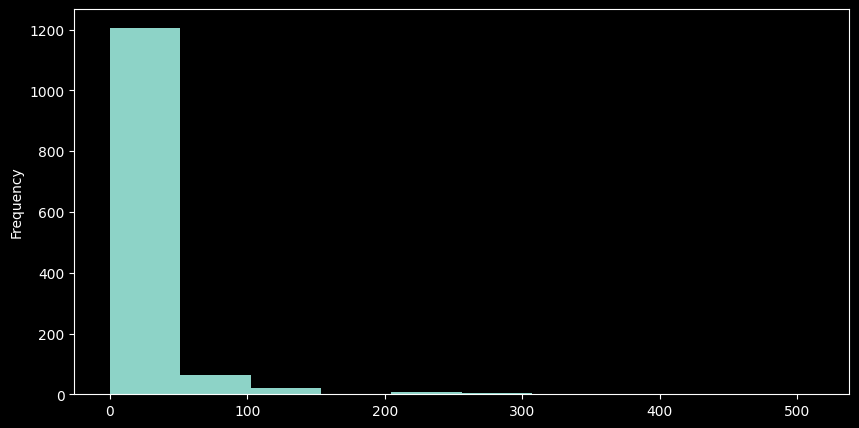

In [241]:
plt.figure(figsize=(10,5))
df['indivisual_fare'].plot(kind ='hist')

ON Fare column

4.367709134122922

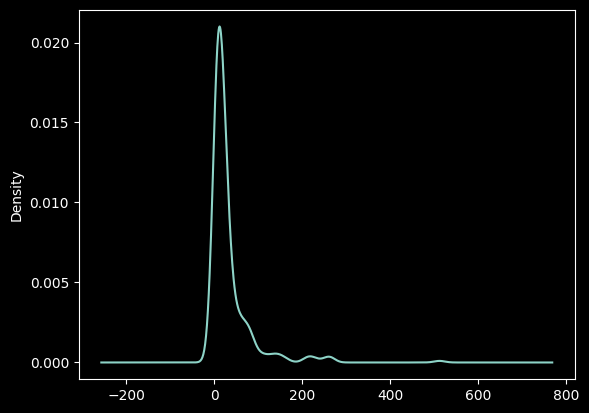

In [242]:
df['Fare'].plot(kind ='kde')
df['Fare'].skew()

ON Indivisual_fare column

6.683189172409639

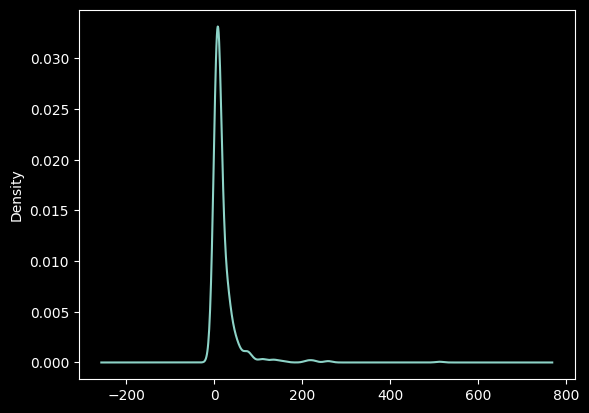

In [243]:
df['indivisual_fare'].plot(kind ='kde')
df['indivisual_fare'].skew()

ON Fare column

<Axes: >

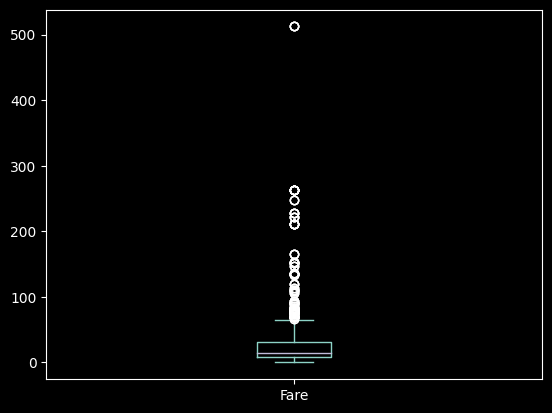

In [244]:
df['Fare'].plot(kind ='box')

ON Indivisual_fare column

<Axes: >

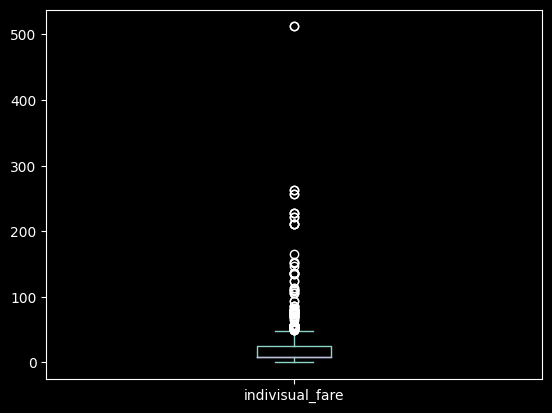

In [245]:
df['indivisual_fare'].plot(kind ='box')

#Survived

### Conclusion
* out of 891 Passengers 549 passengers did not survived and 342 survived.
* In percentage 62% passenger did not survived and 38% survived.
* No Null values

In [246]:
df['Survived'].isnull().sum()

418

In [247]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [248]:
(df['Survived'].value_counts(normalize=True)*100).round()

Survived
0.0    62.0
1.0    38.0
Name: proportion, dtype: float64

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

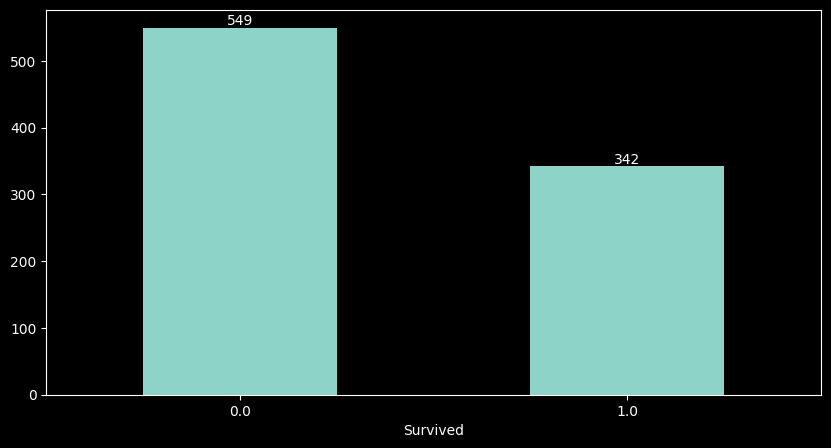

In [249]:
plt.figure(figsize=(10,5))
ax = df['Survived'].value_counts().plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')
plt.xticks(rotation=0)

<Axes: ylabel='count'>

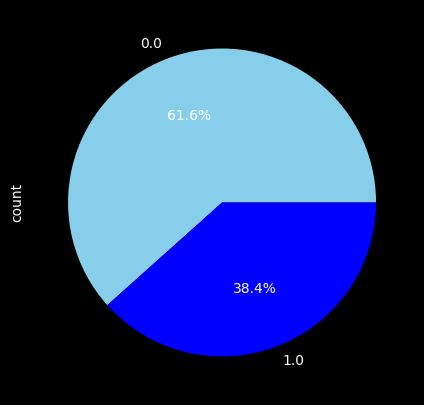

In [315]:
plt.figure(figsize=(8,5))
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['skyblue', 'blue'])

#PClass


###Conclusion
* Pclass has no null values
* Class 3rd is on top (understood because of lessfare)
* Class 1st in on 2nd top (surprisingly less passengers were traveeling in 1st class and less in 2nd class)

In [251]:
df['Pclass'].isnull().sum()

0

In [252]:
df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: ylabel='count'>

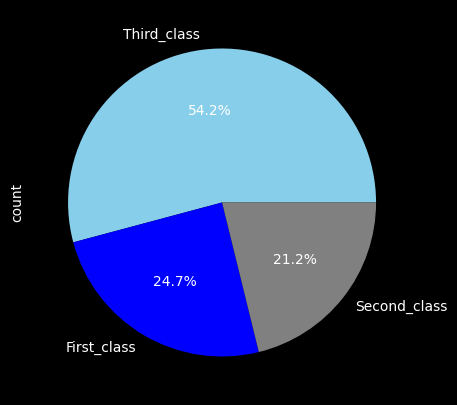

In [317]:
plt.figure(figsize=(10,5))
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%', colors=['skyblue', 'blue', 'grey'])

(array([0, 1, 2]), [Text(0, 0, '3'), Text(1, 0, '1'), Text(2, 0, '2')])

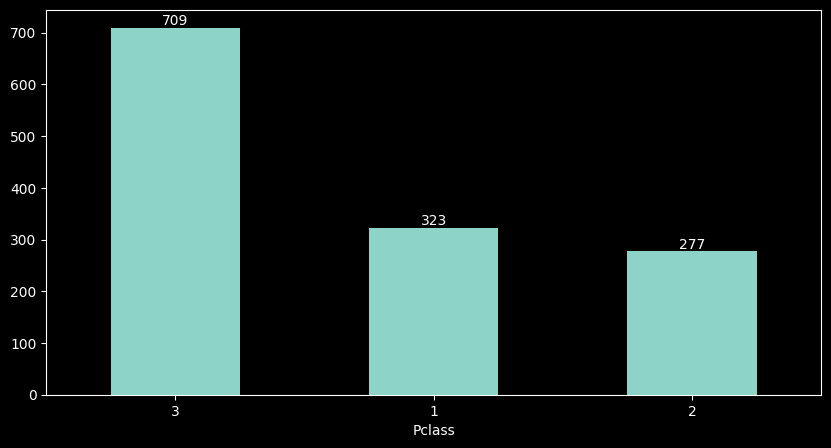

In [254]:
plt.figure(figsize=(10,5))
ax = df['Pclass'].value_counts().plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')
plt.xticks(rotation=0)

##SEX Frequency
###Conclusion
* No null values found
* out 0f 891 pasengers 577 are male and 314 are female.
* female are only 35% and male are 64%.
* No null values Found

In [255]:
df['Sex'].isnull().sum()

0

In [256]:
df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

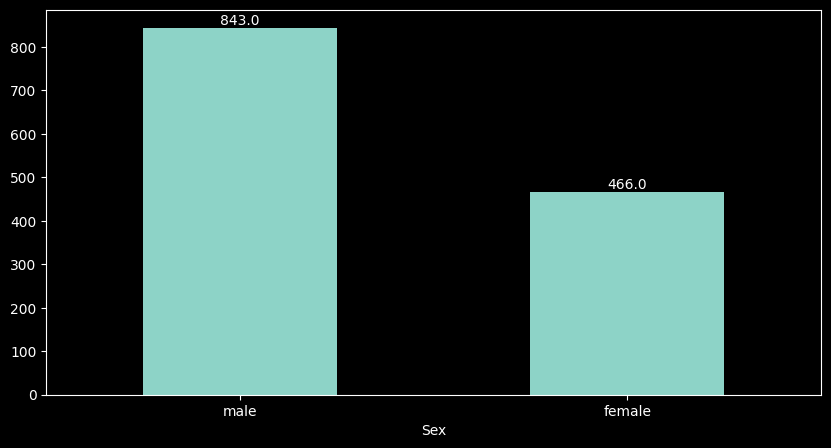

In [257]:
plt.figure(figsize=(10,5))
ax=df['Sex'].value_counts().plot(kind='bar',stacked=True)
for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height(),str(i.get_height()), ha = 'center',va = 'bottom')
plt.xticks(rotation=0)

<Axes: ylabel='count'>

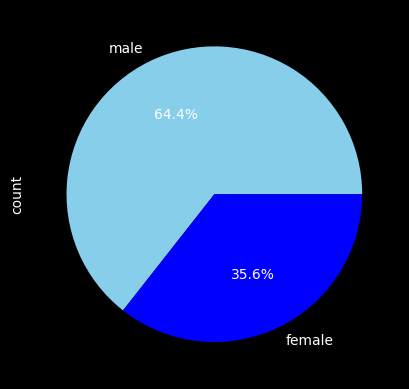

In [320]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%', colors=['skyblue', 'blue'])

##SibSP (Siblings) and Parch (parents with child) == Family_size
###Conclusion
* No null values
* SibSp(Siblings) + Parch is the total size of family as are not any much
 insights lets do feature engineering and fetch the total size
 of the family
* One more column is added so we can get the idea that how many passengers are
 travelling alone called 'Alone'.

In [259]:
df[['SibSp','Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

In [260]:
df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [261]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [262]:
df['FamilySize']=df['SibSp'] + df['Parch']+1

In [263]:
df.head(30)

Survived  Pclass                                               Name  \
1        0.0       3                            Braund, Mr. Owen Harris   
2        1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3        1.0       3                             Heikkinen, Miss. Laina   
4        1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5        0.0       3                           Allen, Mr. William Henry   
6        0.0       3                                   Moran, Mr. James   
7        0.0       1                            McCarthy, Mr. Timothy J   
8        0.0       3                     Palsson, Master. Gosta Leonard   
9        1.0       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10       1.0       2                Nasser, Mrs. Nicholas (Adele Achem)   
11       1.0       3                    Sandstrom, Miss. Marguerite Rut   
12       1.0       1                           Bonnell, Miss. Elizabeth   
13       0.0       3                     Saundercock, Mr. William Henry   
14       0.0       3                        Andersson, Mr. Anders Johan   
15       0.0       3               Vestrom, Miss. Hulda Amanda Adolfina   
16       1.0       2                   Hewlett, Mrs. (Mary D Kingcome)    
17       0.0       3                               Rice, Master. Eugene   
18       1.0       2                       Williams, Mr. Charles Eugene   
19       0.0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
20       1.0       3                            Masselmani, Mrs. Fatima   
21       0.0       2                               Fynney, Mr. Joseph J   
22       1.0       2                              Beesley, Mr. Lawrence   
23       1.0       3                        McGowan, Miss. Anna "Annie"   
24       1.0       1                       Sloper, Mr. William Thompson   
25       0.0       3                      Palsson, Miss. Torborg Danira   
26       1.0       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
27       0.0       3                            Emir, Mr. Farred Chehab   
28       0.0       1                     Fortune, Mr. Charles Alexander   
29       1.0       3                      O'Dwyer, Miss. Ellen "Nellie"   
30       0.0       3                                Todoroff, Mr. Lalio   

       Sex   Age  SibSp  Parch            Ticket      Fare        Cabin  \
1     male  22.0      1      0         A/5 21171    7.2500          NaN   
2   female  38.0      1      0          PC 17599   71.2833          C85   
3   female  26.0      0      0  STON/O2. 3101282    7.9250          NaN   
4   female  35.0      1      0            113803   53.1000         C123   
5     male  35.0      0      0            373450    8.0500          NaN   
6     male   NaN      0      0            330877    8.4583          NaN   
7     male  54.0      0      0             17463   51.8625          E46   
8     male   2.0      3      1            349909   21.0750          NaN   
9   female  27.0      0      2            347742   11.1333          NaN   
10  female  14.0      1      0            237736   30.0708          NaN   
11  female   4.0      1      1           PP 9549   16.7000           G6   
12  female  58.0      0      0            113783   26.5500         C103   
13    male  20.0      0      0         A/5. 2151    8.0500          NaN   
14    male  39.0      1      5            347082   31.2750          NaN   
15  female  14.0      0      0            350406    7.8542          NaN   
16  female  55.0      0      0            248706   16.0000          NaN   
17    male   2.0      4      1            382652   29.1250          NaN   
18    male   NaN      0      0            244373   13.0000          NaN   
19  female  31.0      1      0            345763   18.0000          NaN   
20  female   NaN      0      0              2649    7.2250          NaN   
21    male  35.0      0      0            239865   26.0000          NaN   
22    male  34.0      0     

In [264]:
def transform_family(num):
  if num ==1:
    return 'Alone'
  elif num >=1 and num<=5:
    return 'Small'
  else:
    return 'Large'
df['FamilySize'].apply(transform_family)

1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
413    Alone
414    Alone
415    Alone
416    Alone
417    Small
Name: FamilySize, Length: 1309, dtype: object

In [265]:
df['Family_type']=df['FamilySize'].apply(transform_family)

In [266]:
df.head(10)

Survived  Pclass                                               Name  \
1        0.0       3                            Braund, Mr. Owen Harris   
2        1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3        1.0       3                             Heikkinen, Miss. Laina   
4        1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5        0.0       3                           Allen, Mr. William Henry   
6        0.0       3                                   Moran, Mr. James   
7        0.0       1                            McCarthy, Mr. Timothy J   
8        0.0       3                     Palsson, Master. Gosta Leonard   
9        1.0       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10       1.0       2                Nasser, Mrs. Nicholas (Adele Achem)   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
1     male  22.0      1      0         A/5 21171   7.2500   NaN        S   
2   female  38.0      1      0          PC 17599  71.2833   C85        C   
3   female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
4   female  35.0      1      0            113803  53.1000  C123        S   
5     male  35.0      0      0            373450   8.0500   NaN        S   
6     male   NaN      0      0            330877   8.4583   NaN        Q   
7     male  54.0      0      0             17463  51.8625   E46        S   
8     male   2.0      3      1            349909  21.0750   NaN        S   
9   female  27.0      0      2            347742  11.1333   NaN        S   
10  female  14.0      1      0            237736  30.0708   NaN        C   

    PassengerId  indivisual_fare  FamilySize Family_type  
1           NaN          3.62500           2       Small  
2           NaN         35.64165           2       Small  
3           NaN          7.92500           1       Alone  
4           NaN         26.55000           2       Small  
5           NaN          8.05000           1       Alone  
6           NaN          8.45830           1       Alone  
7           NaN         51.86250           1       Alone  
8           NaN          4.21500           5       Small  
9           NaN          3.71110           3       Small  
10          NaN         15.03540           2       Small

##Embarked (Fom where passenger board the Titanic)

The Titanic began its maiden voyage from Southampton, England, on April 10, 1912. It made stops at Cherbourg, France, and Queenstown (now Cobh), Ireland, before heading across the Atlantic Ocean to its final destination, New York City, USA.

* C: Cherbourg
* Q: Queenstown
* S: Southampton

### Conclusion
* 2 missing Values found
* 914 passengers board from Southampton
* 270 passengers board from Cherbourg
* 123 passengers board from Queenstown


In [267]:
df['Embarked']=df['Embarked'].replace({'S': 'Southampton','C': 'Cherbourg','Q': 'Queenstown' })

In [268]:
df['Embarked'].isnull().sum()

2

In [269]:
df[df['Embarked'].isnull()]

Survived  Pclass                                       Name     Sex  \
62        1.0       1                        Icard, Miss. Amelie  female   
830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  PassengerId  \
62   38.0      0      0  113572  80.0   B28      NaN          NaN   
830  62.0      0      0  113572  80.0   B28      NaN          NaN   

     indivisual_fare  FamilySize Family_type  
62              80.0           1       Alone  
830             80.0           1       Alone

In [270]:
df['Embarked'].value_counts()

Embarked
Southampton    914
Cherbourg      270
Queenstown     123
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Southampton'),
  Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown')])

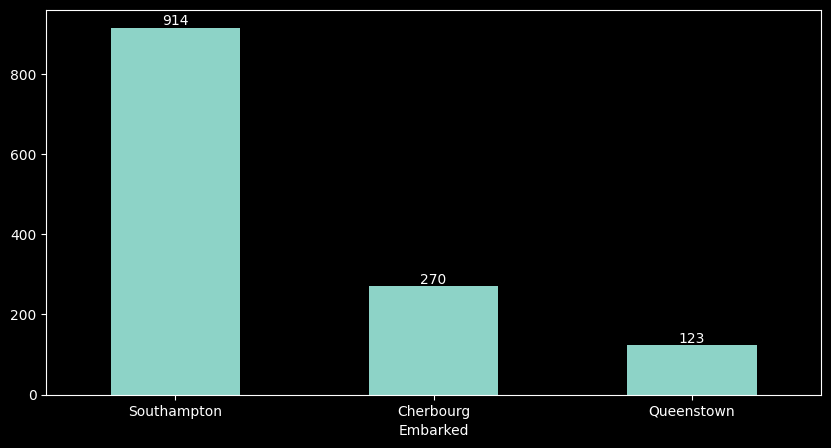

In [271]:
plt.figure(figsize=(10,5))
ax=df['Embarked'].value_counts().plot(kind='bar')
for i in ax.patches:
  ax.text(i.get_x()+i.get_width() / 2,i.get_height(),str(i.get_height()),ha = 'center',va='bottom')
plt.xticks(rotation=0)

<Axes: ylabel='count'>

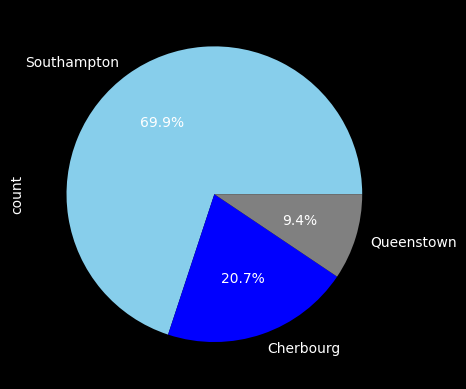

In [321]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['skyblue', 'blue','grey'])

###Tickets

####Conclusion
* uploaded image for better understanding
* From the class 1st we have 188 passengers.
* From the class 2nd we have 192 passengers.
* From the class 3rd we have 549 passengers.


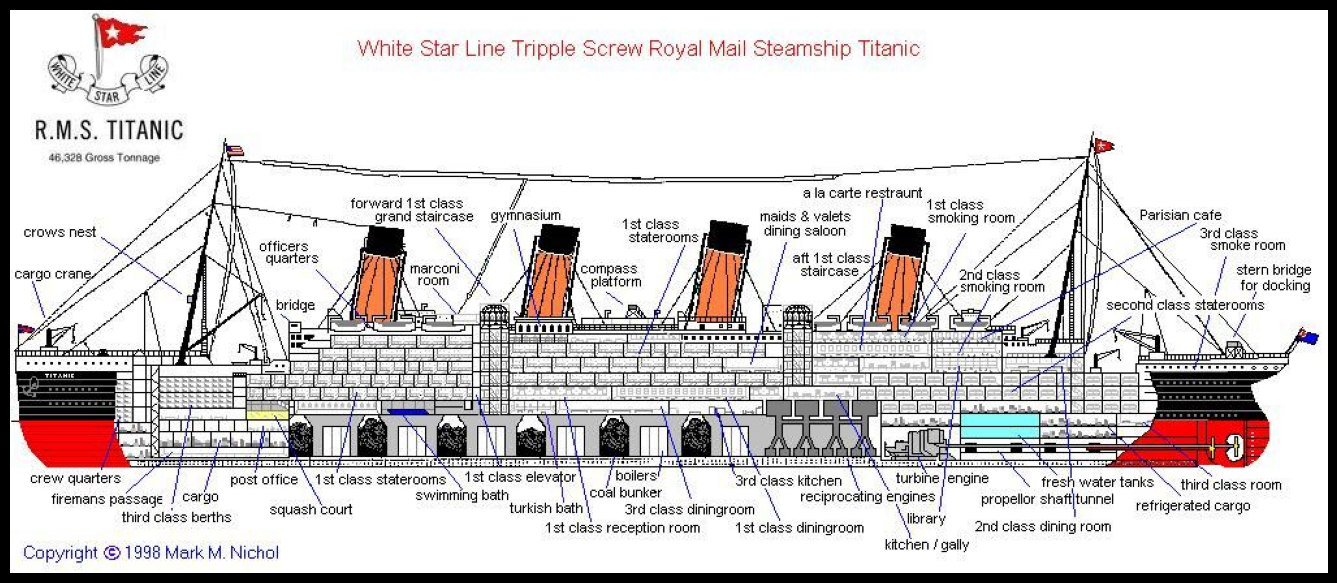

In [273]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


image_url = 'https://cdn-cdaac.nitrocdn.com/tFOqLIaMYIaFjSGNUoYXbEDiJHtqbEtH/assets/images/optimized/rev-0596f3a/www.historyonthenet.com/wp-content/uploads/2014/08/MGY_Cutaway2.JPG'

try:

    response = requests.get(image_url)
    response.raise_for_status()


    img = Image.open(BytesIO(response.content))


    plt.figure(figsize=(17, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error fetching the image: {e}")
except Image.UnidentifiedImageError:
    print("Error: The URL does not contain a valid image.")


In [274]:
df['Pclass']=df['Pclass'].replace({1:'First_class',2:'Second_class',3:'Third_class'})

In [275]:
df['Ticket'].isnull().sum()

0

In [276]:
 Tic_clas = df.groupby('Pclass')[['Ticket']].nunique()

In [277]:
df.groupby(['Ticket','Pclass'])[['FamilySize']].count().sort_values('Pclass').reset_index()

Ticket       Pclass  FamilySize
0    110152  First_class           3
1     19996  First_class           2
2     21228  First_class           2
3     24160  First_class           4
4      2543  First_class           1
..      ...          ...         ...
924  348123  Third_class           1
925  348124  Third_class           1
926  348125  Third_class           1
927  349202  Third_class           1
928  347088  Third_class           6

[929 rows x 3 columns]

(array([0, 1, 2]),
 [Text(0, 0, 'First_class'),
  Text(1, 0, 'Second_class'),
  Text(2, 0, 'Third_class')])

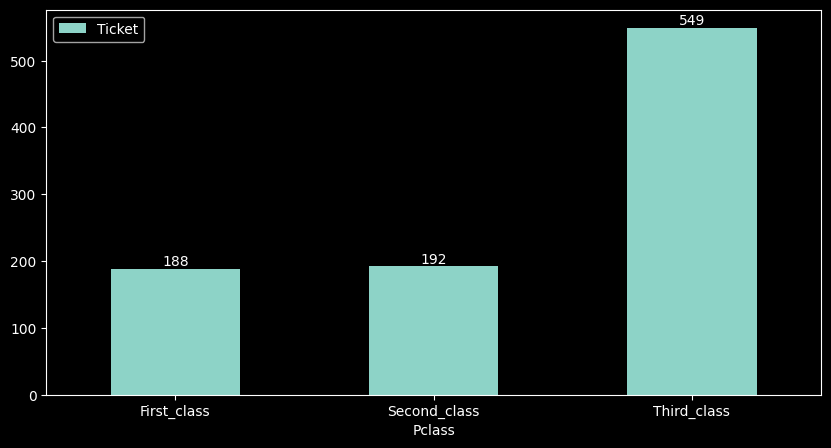

In [278]:
ax =Tic_clas.plot(kind= 'bar',figsize= (10,5))
for i in ax.patches:
  ax.text(i.get_x() + i.get_width() /2, i.get_height(),str(i.get_height()),ha='center',va= 'bottom')

plt.xticks(rotation=0)

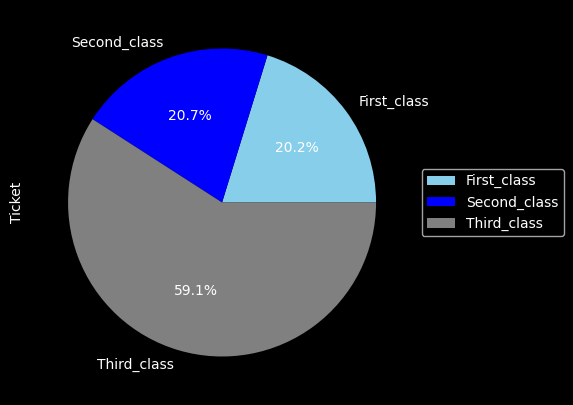

In [322]:
Tic_clas.plot(kind='pie', y='Ticket', autopct='%0.1f%%', figsize=(10,5),colors=['skyblue', 'blue','grey'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

###Cabin
####Conclusion
* Total is 1309 and out of this 1014 is null values.
* No Data found for null values to be filled.
* Some of passengers are given same cabin if family size is small and  
  travelling on same ticket number but can not validate on large family cabin distribution (Data is missing)

In [280]:
df['Cabin'].nunique()

186

In [281]:
df['Cabin'].size

1309

In [282]:
df['Cabin'].isnull().value_counts()

Cabin
True     1014
False     295
Name: count, dtype: int64

Total missing Values

In [283]:
df['Cabin'].isnull().sum()

1014

Missing Values in percentage

In [284]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [285]:
df['Cabin'].fillna('Missing_values',inplace=True)

In [286]:
df['Cabin'].value_counts()

Cabin
Missing_values     1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [287]:
 df['Deck']= df['Cabin'].str[0]

In [288]:
df

Survived       Pclass                                               Name  \
1         0.0  Third_class                            Braund, Mr. Owen Harris   
2         1.0  First_class  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3         1.0  Third_class                             Heikkinen, Miss. Laina   
4         1.0  First_class       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5         0.0  Third_class                           Allen, Mr. William Henry   
..        ...          ...                                                ...   
413       NaN  Third_class                                 Spector, Mr. Woolf   
414       NaN  First_class                       Oliva y Ocana, Dona. Fermina   
415       NaN  Third_class                       Saether, Mr. Simon Sivertsen   
416       NaN  Third_class                                Ware, Mr. Frederick   
417       NaN  Third_class                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare           Cabin  \
1      male  22.0      1      0           A/5 21171    7.2500  Missing_values   
2    female  38.0      1      0            PC 17599   71.2833             C85   
3    female  26.0      0      0    STON/O2. 3101282    7.9250  Missing_values   
4    female  35.0      1      0              113803   53.1000            C123   
5      male  35.0      0      0              373450    8.0500  Missing_values   
..      ...   ...    ...    ...                 ...       ...             ...   
413    male   NaN      0      0           A.5. 3236    8.0500  Missing_values   
414  female  39.0      0      0            PC 17758  108.9000            C105   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500  Missing_values   
416    male   NaN      0      0              359309    8.0500  Missing_values   
417    male   NaN      1      1                2668   22.3583  Missing_values   

        Embarked  PassengerId  indivisual_fare  FamilySize Family_type Deck  
1    Southampton          NaN         3.625000           2       Small    M  
2      Cherbourg          NaN        35.641650           2       Small    C  
3    Southampton          NaN         7.925000           1       Alone    M  
4    Southampton          NaN        26.550000           2       Small    C  
5    Southampton          NaN         8.050000           1       Alone    M  
..           ...          ...              ...         ...         ...  ...  
413  Southampton       1305.0         8.050000           1       Alone    M  
414    Cherbourg       1306.0       108.900000           1       Alone    C  
415  Southampton       1307.0         7.250000           1       Alone    M  
416  Southampton       1308.0         8.050000           1       Alone    M  
417    Cherbourg       1309.0         7.452767           3       Small    M  

[1309 rows x 16 columns]

* A Deck, also called the promenade deck. It was reserved exclusively for First Class passengers and contained First Class cabins.
* B Deck, the bridge deck, was the top weight-bearing deck and the uppermost level of the hull.
* C Deck, the shelter deck, was the highest deck to run uninterrupted from stem to stern.It included both well decks; the aft one served as part of the Third-Class promenade.
* D Deck, the saloon deck, was dominated by three public rooms—the First-Class reception room, the First-Class dining saloon and the Second-Class dining saloon.
* E Deck, the upper deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers. Along its length ran a long passageway nicknamed 'Scotland Road', in reference to a famous street in Liverpool. Scotland Road was used by Third Class passengers and crew members.
* F Deck, the middle deck, mainly accommodated Second- and Third-Class passengers and several departments of the crew. The Third Class dining saloon was located here, as was the First Class bath complex, containing the swimming pool and the Turkish bath.
* G Deck, the lower deck, had the lowest portholes, just above the waterline. The first-class squash court was located here along with the travelling post office where letters and parcels were sorted ready for delivery when the ship docked. Food was also stored here. The deck was interrupted at several points by orlop (partial) decks over the boiler, engine and turbine rooms.
* M stands for missing values.
* Deck T is top tank,The orlop decks, and the tank top below that, were on the lowest level of the ship, below the waterline. The orlop decks were used as cargo spaces, while the tank top.

In [289]:
df['Deck'].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [290]:
pd.crosstab(df['Deck'],df['Pclass'])

Pclass  First_class  Second_class  Third_class
Deck                                          
A                22             0            0
B                65             0            0
C                94             0            0
D                40             6            0
E                34             4            3
F                 0            13            8
G                 0             0            5
M                67           254          693
T                 1             0            0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'M'),
  Text(8, 0, 'T')])

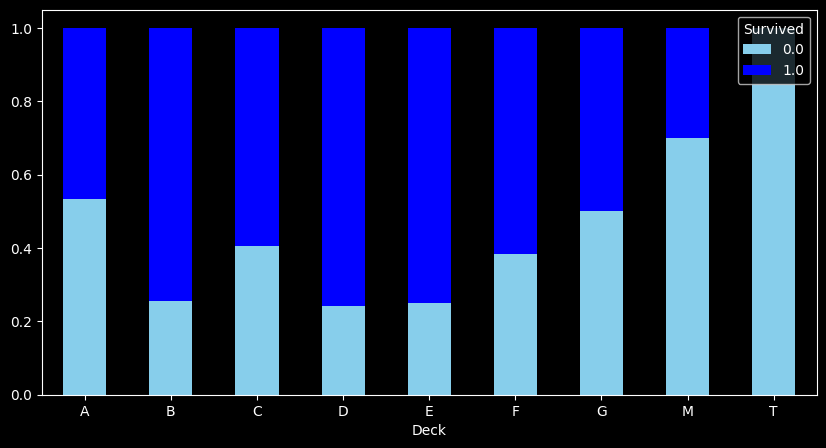

In [325]:
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind= 'bar',stacked =True,figsize=(10,5),color=['skyblue', 'blue'])
plt.xticks(rotation = 0)

In [296]:
df

Survived       Pclass                                               Name  \
1         0.0  Third_class                            Braund, Mr. Owen Harris   
2         1.0  First_class  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3         1.0  Third_class                             Heikkinen, Miss. Laina   
4         1.0  First_class       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5         0.0  Third_class                           Allen, Mr. William Henry   
..        ...          ...                                                ...   
413       NaN  Third_class                                 Spector, Mr. Woolf   
414       NaN  First_class                       Oliva y Ocana, Dona. Fermina   
415       NaN  Third_class                       Saether, Mr. Simon Sivertsen   
416       NaN  Third_class                                Ware, Mr. Frederick   
417       NaN  Third_class                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare           Cabin  \
1      male  22.0      1      0           A/5 21171    7.2500  Missing_values   
2    female  38.0      1      0            PC 17599   71.2833             C85   
3    female  26.0      0      0    STON/O2. 3101282    7.9250  Missing_values   
4    female  35.0      1      0              113803   53.1000            C123   
5      male  35.0      0      0              373450    8.0500  Missing_values   
..      ...   ...    ...    ...                 ...       ...             ...   
413    male   NaN      0      0           A.5. 3236    8.0500  Missing_values   
414  female  39.0      0      0            PC 17758  108.9000            C105   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500  Missing_values   
416    male   NaN      0      0              359309    8.0500  Missing_values   
417    male   NaN      1      1                2668   22.3583  Missing_values   

        Embarked  PassengerId  indivisual_fare  FamilySize Family_type Deck  
1    Southampton          NaN         3.625000           2       Small    M  
2      Cherbourg          NaN        35.641650           2       Small    C  
3    Southampton          NaN         7.925000           1       Alone    M  
4    Southampton          NaN        26.550000           2       Small    C  
5    Southampton          NaN         8.050000           1       Alone    M  
..           ...          ...              ...         ...         ...  ...  
413  Southampton       1305.0         8.050000           1       Alone    M  
414    Cherbourg       1306.0       108.900000           1       Alone    C  
415  Southampton       1307.0         7.250000           1       Alone    M  
416  Southampton       1308.0         8.050000           1       Alone    M  
417    Cherbourg       1309.0         7.452767           3       Small    M  

[1309 rows x 16 columns]

###Name & Titles
* Mr. -> Mister or Mr.: This is the term that is used to address men, whether they are married or unmarried.
* Miss  -> Miss is a common title for unmarried women up to roughly the age of 30
* Miss -> Used for unmarriade women.
* Master -> Young boys under the age of 18.
* Reverend(Rev) ->  Rank of an officially appointed religious leader.
* Dr. ->  Who has obtained a doctorate
* Colonel(Col) -> Rank in the Indian Army.
* MLLe -> Is a French courtesy title, abbreviated Mlle or Dlle, traditionally given to an unmarried woman. The equivalent in English is "Miss".
* Major -> A military rank.
('Academic major, an academic discipline to which an undergraduate student formally commits. People named Major, including given names,
surnames, nicknames.')    
* Lady ->  Any adult woman
* Sir -> A man who has been given a knighthood
* Mme -> Madame (Mme) for a woman. The plural is Mesdames (Mmes).
"Mademoiselle" (Mlle) is a traditional alternative for an unmarried woman.
* Don & Dona -> It is similar to Mr and Mrs (Señor & Señora), but Don and Doña has a small difference, is a title of respect that only comes before the first name, sometimes for the full name (first name, followed by last name), and never for the last name only. Commonly used today when addressing senior people.   
* Capt -> Captain (nautical), a licensed civilian mariner or person who is
legally in command of a merchant ship, a yacht or another type of vessel that may or may not be carrying passengers for hire.
* the -> We use a title (Mr, Mrs, Ms, Dr, Prof) and the surname in more formal
situations.
* Jonkheer -> Jonkheer is, in Belgium, the lowest title and an official Dutch
mark of status (not a title), as stated above, and is used as such, most notably by members of the Dutch royal family                   

####Conclusion
* counted the number of titles


In [297]:
df['Title']=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [298]:
df

Survived       Pclass                                               Name  \
1         0.0  Third_class                            Braund, Mr. Owen Harris   
2         1.0  First_class  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3         1.0  Third_class                             Heikkinen, Miss. Laina   
4         1.0  First_class       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5         0.0  Third_class                           Allen, Mr. William Henry   
..        ...          ...                                                ...   
413       NaN  Third_class                                 Spector, Mr. Woolf   
414       NaN  First_class                       Oliva y Ocana, Dona. Fermina   
415       NaN  Third_class                       Saether, Mr. Simon Sivertsen   
416       NaN  Third_class                                Ware, Mr. Frederick   
417       NaN  Third_class                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare           Cabin  \
1      male  22.0      1      0           A/5 21171    7.2500  Missing_values   
2    female  38.0      1      0            PC 17599   71.2833             C85   
3    female  26.0      0      0    STON/O2. 3101282    7.9250  Missing_values   
4    female  35.0      1      0              113803   53.1000            C123   
5      male  35.0      0      0              373450    8.0500  Missing_values   
..      ...   ...    ...    ...                 ...       ...             ...   
413    male   NaN      0      0           A.5. 3236    8.0500  Missing_values   
414  female  39.0      0      0            PC 17758  108.9000            C105   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500  Missing_values   
416    male   NaN      0      0              359309    8.0500  Missing_values   
417    male   NaN      1      1                2668   22.3583  Missing_values   

        Embarked  PassengerId  indivisual_fare  FamilySize Family_type Deck  \
1    Southampton          NaN         3.625000           2       Small    M   
2      Cherbourg          NaN        35.641650           2       Small    C   
3    Southampton          NaN         7.925000           1       Alone    M   
4    Southampton          NaN        26.550000           2       Small    C   
5    Southampton          NaN         8.050000           1       Alone    M   
..           ...          ...              ...         ...         ...  ...   
413  Southampton       1305.0         8.050000           1       Alone    M   
414    Cherbourg       1306.0       108.900000           1       Alone    C   
415  Southampton       1307.0         7.250000           1       Alone    M   
416  Southampton       1308.0         8.050000           1       Alone    M   
417    Cherbourg       1309.0         7.452767           3       Small    M   

       Title  
1        Mr.  
2       Mrs.  
3      Miss.  
4       Mrs.  
5        Mr.  
..       ...  
413      Mr.  
414    Dona.  
415      Mr.  
416      Mr.  
417  Master.  

[1309 rows x 17 columns]

In [299]:
df['Title'].replace({'Mlle.':'Miss.','Ms.': 'Miss.','Don.': 'Mrs.','Dona.': 'Mrs.','Jonkheer.': 'The','the':'The','Mme.':'Madam','Rev.': 'Reverend'},inplace=True)

In [300]:
df['Title'].value_counts()

Title
Mr.         757
Miss.       264
Mrs.        199
Master.      61
Reverend      8
Dr.           8
Col.          4
Major.        2
The           2
Madam         1
Lady.         1
Sir.          1
Capt.         1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Mr.'),
  Text(1, 0, 'Miss.'),
  Text(2, 0, 'Mrs.'),
  Text(3, 0, 'Master.'),
  Text(4, 0, 'Reverend'),
  Text(5, 0, 'Dr.'),
  Text(6, 0, 'Col.'),
  Text(7, 0, 'Major.'),
  Text(8, 0, 'The'),
  Text(9, 0, 'Madam'),
  Text(10, 0, 'Lady.'),
  Text(11, 0, 'Sir.'),
  Text(12, 0, 'Capt.')])

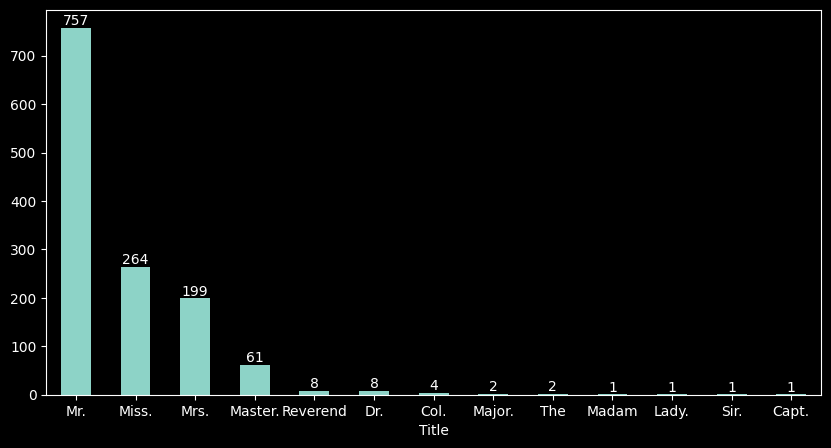

In [301]:
ax = df['Title'].value_counts().plot( kind = 'bar' ,figsize=(10,5))
for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height(),str(i.get_height()),ha = 'center',va = 'bottom')
plt.xticks(rotation=0)

2.772419184464289


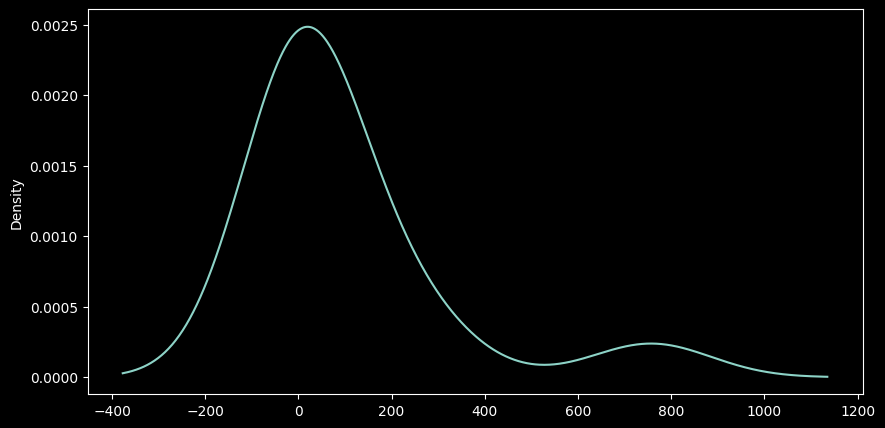

In [302]:
df['Title'].value_counts().plot( kind = 'kde' ,figsize=(10,5))
df['Title'] = df['Title'].astype(str)
ax = df['Title'].value_counts().skew()
print(ax)


Survival Posiblities
* Rich passengers belongs to 'First Class' have more chances to be saved(discrimation can be seen clearly even in that time too).



In [303]:
pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100

Pclass    First_class  Second_class  Third_class
Survived                                        
0.0         37.037037     52.717391    75.763747
1.0         62.962963     47.282609    24.236253

<Axes: xlabel='Pclass', ylabel='Survived'>

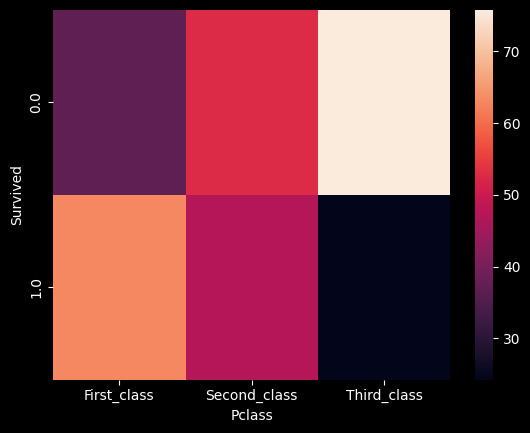

In [304]:
survived_by_Class = pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100
sns.heatmap(survived)

* Females were saved more if we count suvival rate as sex.
(Ladies first concept)

In [305]:
pd.crosstab(df['Survived'],df['Sex'],normalize= 'columns')*100

Sex          female       male
Survived                      
0.0       25.796178  81.109185
1.0       74.203822  18.890815

In [306]:
pd.crosstab(df['Age'],df['Survived'],normalize= 'columns')*100

Survived       0.0       1.0
Age                         
0.42      0.000000  0.344828
0.67      0.000000  0.344828
0.75      0.000000  0.689655
0.83      0.000000  0.689655
0.92      0.000000  0.344828
...            ...       ...
70.00     0.471698  0.000000
70.50     0.235849  0.000000
71.00     0.471698  0.000000
74.00     0.235849  0.000000
80.00     0.000000  0.344828

[88 rows x 2 columns]

Survival rate of child between 0 to 5 is higher comparative other ages.
Age is very important factor of survival


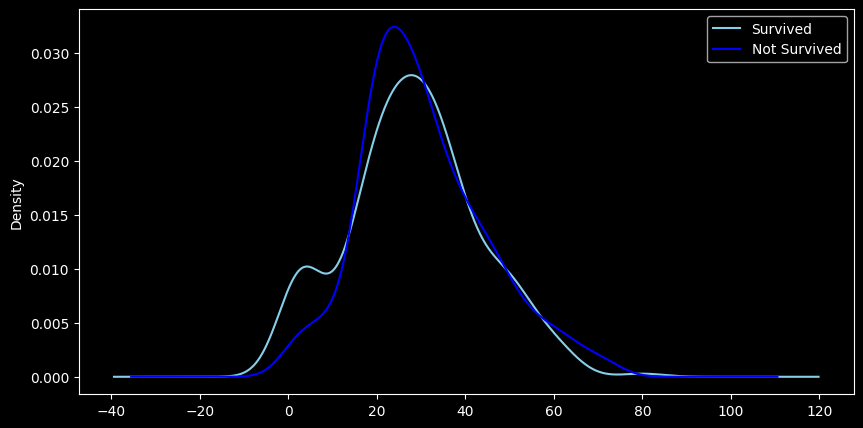

In [331]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived',figsize=(10,5),color='skyblue')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not Survived',figsize=(10,5),color= 'blue')
plt.legend()

The passenger were travelling with small family survived more in comparison of travelling Alone and with Large Family type.

In [308]:
pd.crosstab(df['Survived'],df['Family_type'],normalize= 'columns')*100

Family_type      Alone      Large      Small
Survived                                    
0.0          69.646182  85.106383  43.973941
1.0          30.353818  14.893617  56.026059

The passengers belongs to first_class and board the Ship from Cherbourg have higher rate of survival in comparison to sex.

In [309]:
pd.crosstab(df['Survived'],df['Embarked'],normalize= 'columns')*100

Embarked  Cherbourg  Queenstown  Southampton
Survived                                    
0.0       44.642857   61.038961    66.304348
1.0       55.357143   38.961039    33.695652

In [310]:
pd.crosstab(df['Sex'],df['Embarked'],normalize= 'columns')*100

Embarked  Cherbourg  Queenstown  Southampton
Sex                                         
female    41.851852   48.780488    31.838074
male      58.148148   51.219512    68.161926

Pclass Firstclass survived more

In [311]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize= 'columns')*100

Embarked      Cherbourg  Queenstown  Southampton
Pclass                                          
First_class   52.222222    2.439024    19.365427
Second_class  10.370370    5.691057    26.477024
Third_class   37.407407   91.869919    54.157549

In [312]:
df

Survived       Pclass                                               Name  \
1         0.0  Third_class                            Braund, Mr. Owen Harris   
2         1.0  First_class  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3         1.0  Third_class                             Heikkinen, Miss. Laina   
4         1.0  First_class       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5         0.0  Third_class                           Allen, Mr. William Henry   
..        ...          ...                                                ...   
413       NaN  Third_class                                 Spector, Mr. Woolf   
414       NaN  First_class                       Oliva y Ocana, Dona. Fermina   
415       NaN  Third_class                       Saether, Mr. Simon Sivertsen   
416       NaN  Third_class                                Ware, Mr. Frederick   
417       NaN  Third_class                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare           Cabin  \
1      male  22.0      1      0           A/5 21171    7.2500  Missing_values   
2    female  38.0      1      0            PC 17599   71.2833             C85   
3    female  26.0      0      0    STON/O2. 3101282    7.9250  Missing_values   
4    female  35.0      1      0              113803   53.1000            C123   
5      male  35.0      0      0              373450    8.0500  Missing_values   
..      ...   ...    ...    ...                 ...       ...             ...   
413    male   NaN      0      0           A.5. 3236    8.0500  Missing_values   
414  female  39.0      0      0            PC 17758  108.9000            C105   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500  Missing_values   
416    male   NaN      0      0              359309    8.0500  Missing_values   
417    male   NaN      1      1                2668   22.3583  Missing_values   

        Embarked  PassengerId  indivisual_fare  FamilySize Family_type Deck  \
1    Southampton          NaN         3.625000           2       Small    M   
2      Cherbourg          NaN        35.641650           2       Small    C   
3    Southampton          NaN         7.925000           1       Alone    M   
4    Southampton          NaN        26.550000           2       Small    C   
5    Southampton          NaN         8.050000           1       Alone    M   
..           ...          ...              ...         ...         ...  ...   
413  Southampton       1305.0         8.050000           1       Alone    M   
414    Cherbourg       1306.0       108.900000           1       Alone    C   
415  Southampton       1307.0         7.250000           1       Alone    M   
416  Southampton       1308.0         8.050000           1       Alone    M   
417    Cherbourg       1309.0         7.452767           3       Small    M   

       Title  
1        Mr.  
2       Mrs.  
3      Miss.  
4       Mrs.  
5        Mr.  
..       ...  
413      Mr.  
414     Mrs.  
415      Mr.  
416      Mr.  
417  Master.  

[1309 rows x 17 columns]

In [334]:
df.corr()

ValueError: could not convert string to float: 'Third_class'

In [337]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived         1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass          -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629   
Age             -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740   
SibSp           -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238   
Parch            0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539   
Fare             0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000   
PassengerId           NaN -0.026751 -0.034102  0.003818  0.043080  0.008211   
indivisual_fare  0.221600 -0.504270  0.193545 -0.089807 -0.065498  0.832029   
FamilySize       0.016639  0.050027 -0.240229  0.861952  0.792296  0.226492   

                 PassengerId  indivisual_fare  FamilySize  
Survived                 NaN         0.221600    0.016639  
Pclass             -0.026751        -0.504270    0.050027  
Age                -0.034102         0.193545   -0.240229  
SibSp               0.003818        -0.089807    0.861952  
Parch               0.043080        -0.065498    0.792296  
Fare                0.008211         0.832029    0.226492  
PassengerId         1.000000         0.032408    0.030087  
indivisual_fare     0.032408         1.000000   -0.094874  
FamilySize          0.030087        -0.094874    1.000000

In [338]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()['Survived']

Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
PassengerId             NaN
indivisual_fare    0.221600
FamilySize         0.016639
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Pclass'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch'),
  Text(5.5, 0, 'Fare'),
  Text(6.5, 0, 'PassengerId'),
  Text(7.5, 0, 'indivisual_fare'),
  Text(8.5, 0, 'FamilySize')])

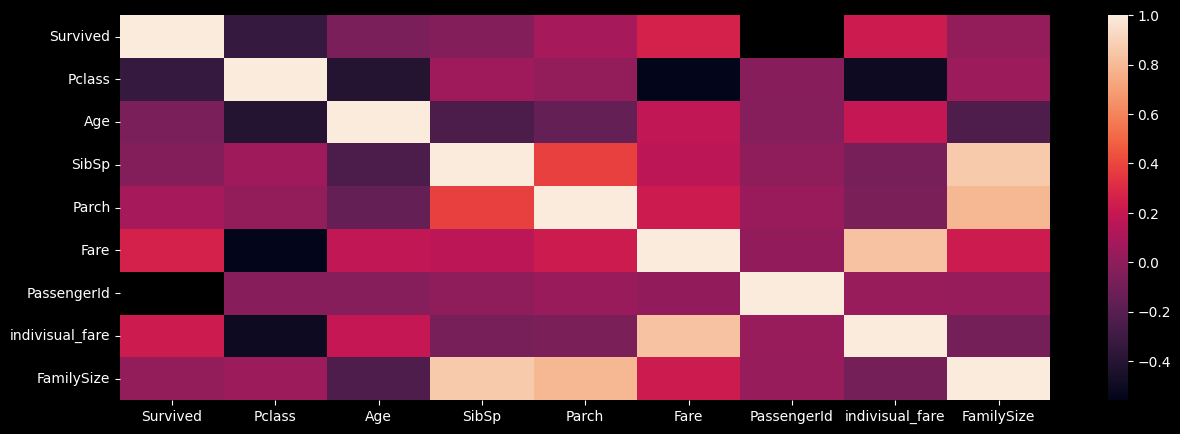

In [343]:
plt.figure(figsize=(15,5))
sns.heatmap(numerical_df.corr())
plt.xticks(rotation=0)

ValueError: cannot reindex on an axis with duplicate labels

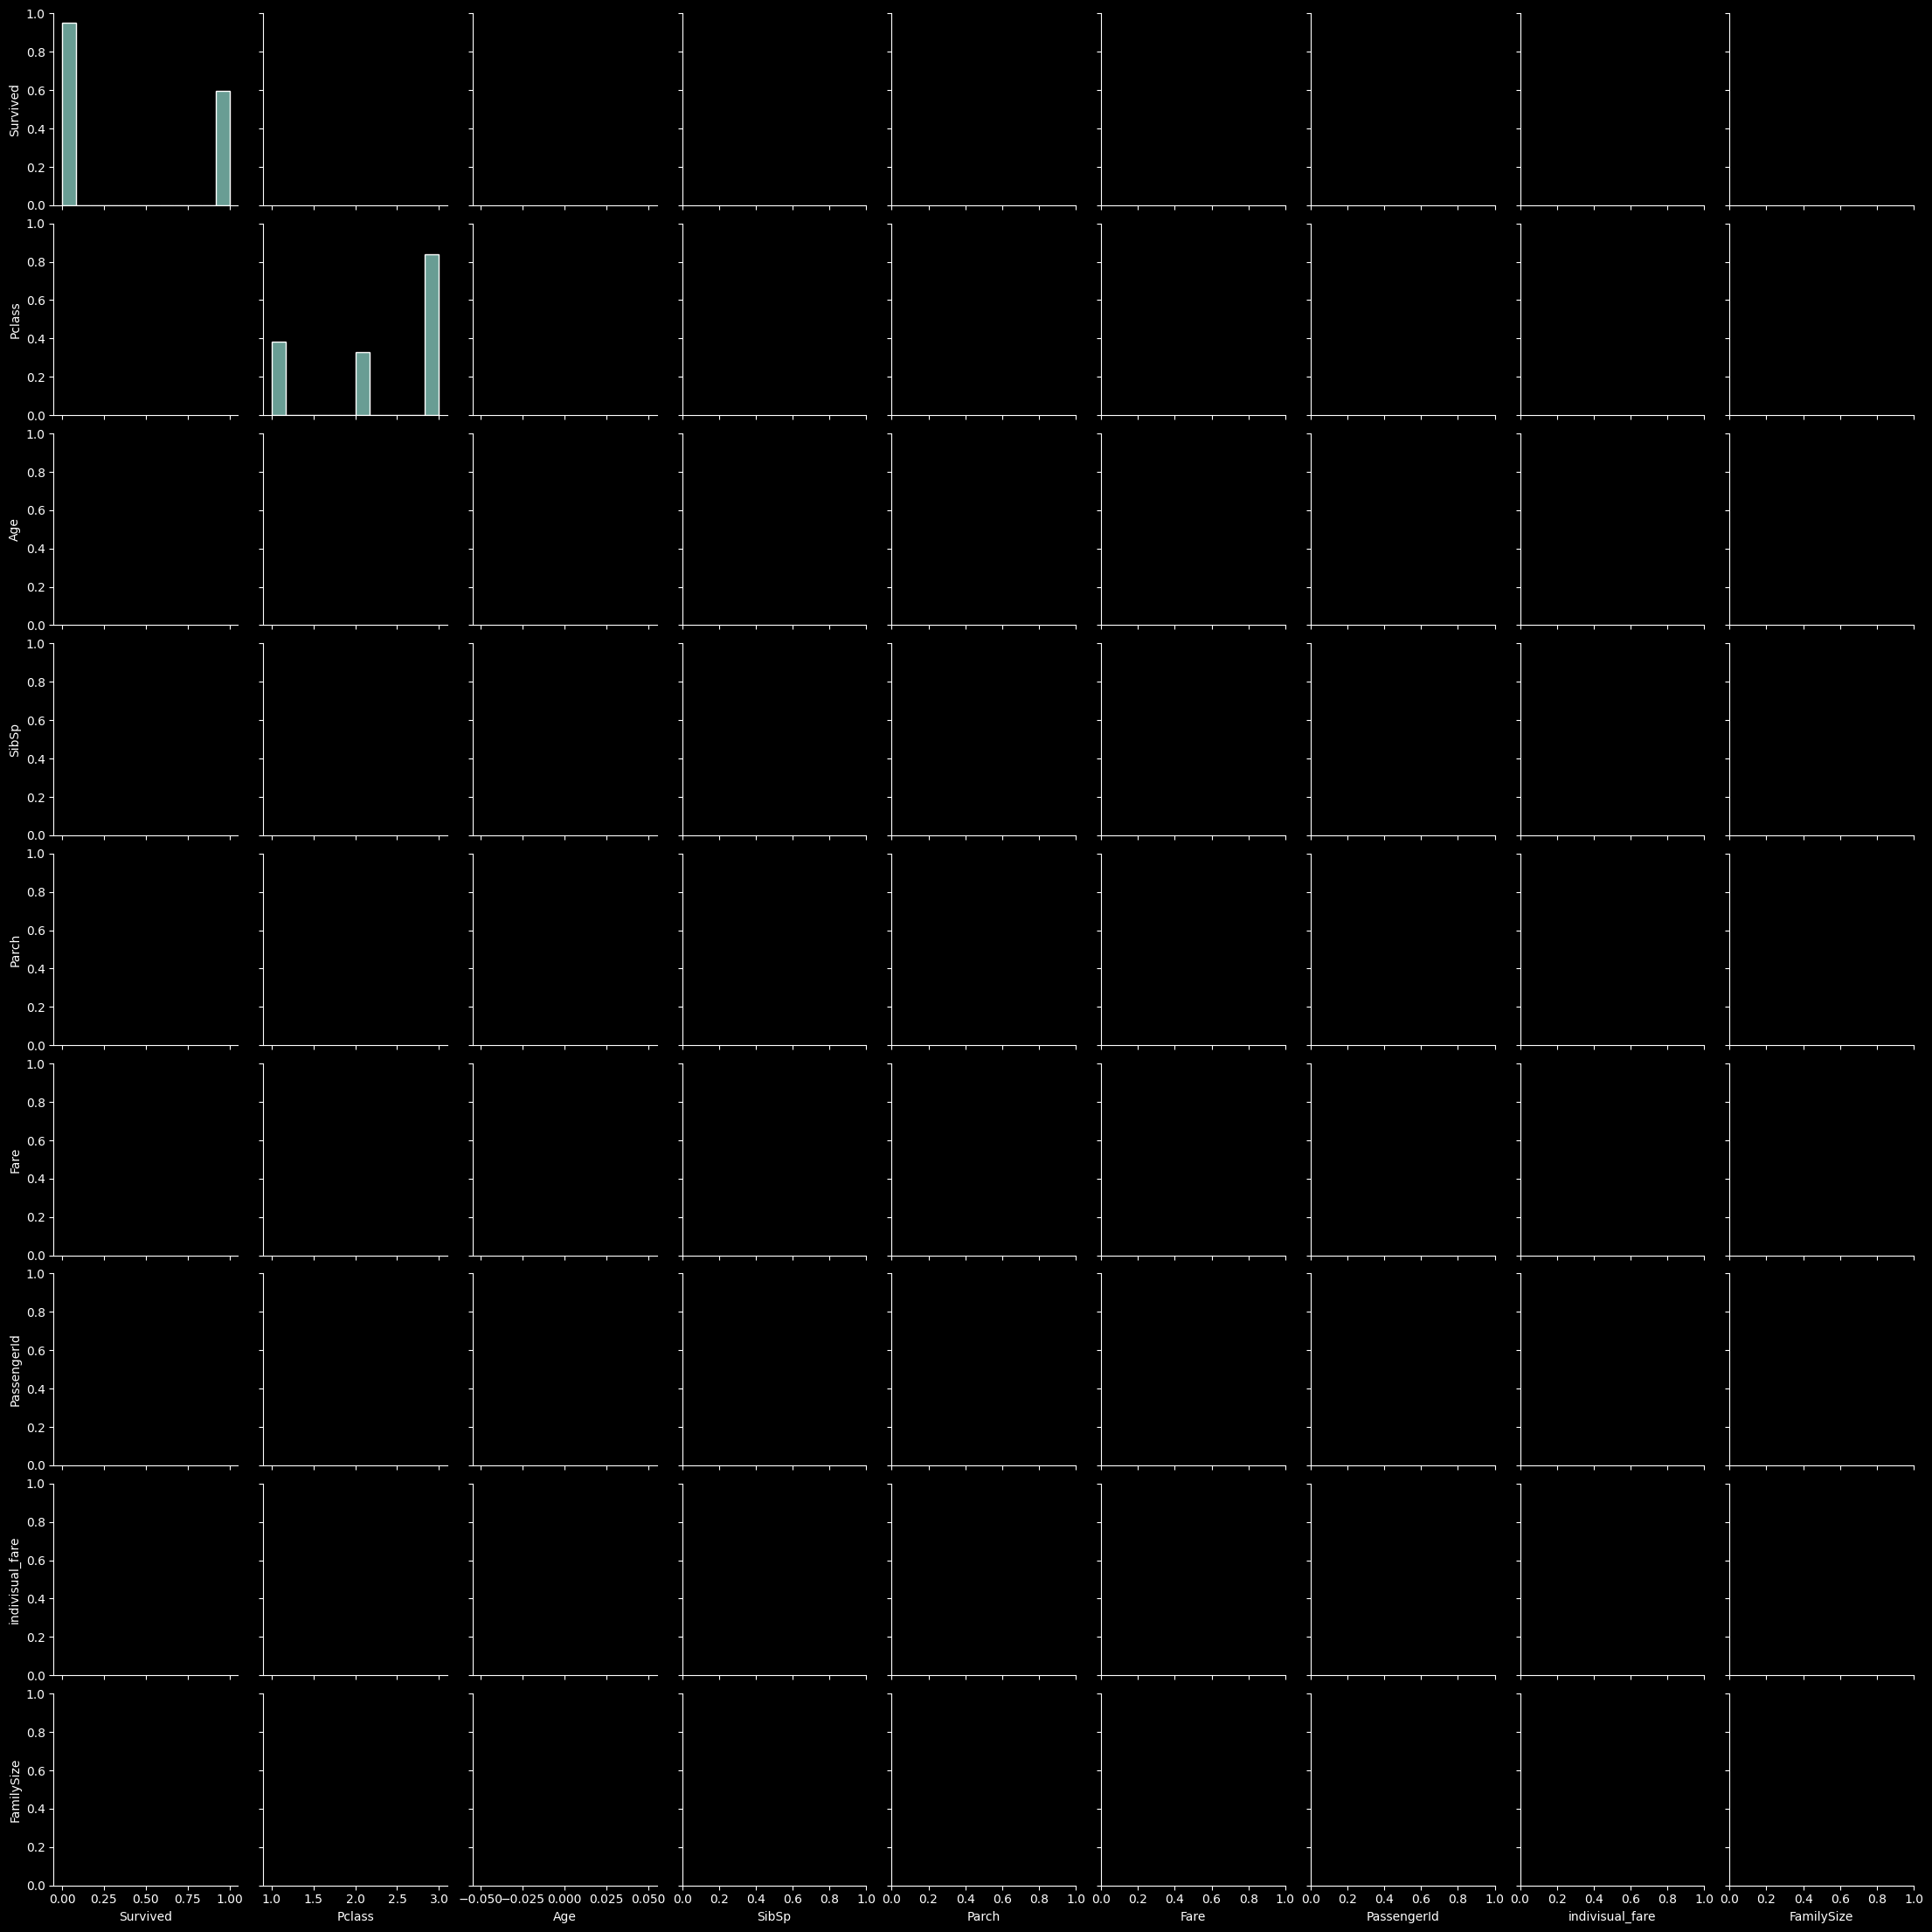

In [344]:
sns.pairplot(df)

Column 'Survived' has duplicate indices.
Column 'Pclass' has duplicate indices.
Column 'Name' has duplicate indices.
Column 'Sex' has duplicate indices.
Column 'Age' has duplicate indices.
Column 'SibSp' has duplicate indices.
Column 'Parch' has duplicate indices.
Column 'Ticket' has duplicate indices.
Column 'Fare' has duplicate indices.
Column 'Cabin' has duplicate indices.
Column 'Embarked' has duplicate indices.
Column 'PassengerId' has duplicate indices.
Column 'indivisual_fare' has duplicate indices.
Column 'FamilySize' has duplicate indices.
Column 'Family_type' has duplicate indices.
Column 'Deck' has duplicate indices.
Column 'Title' has duplicate indices.


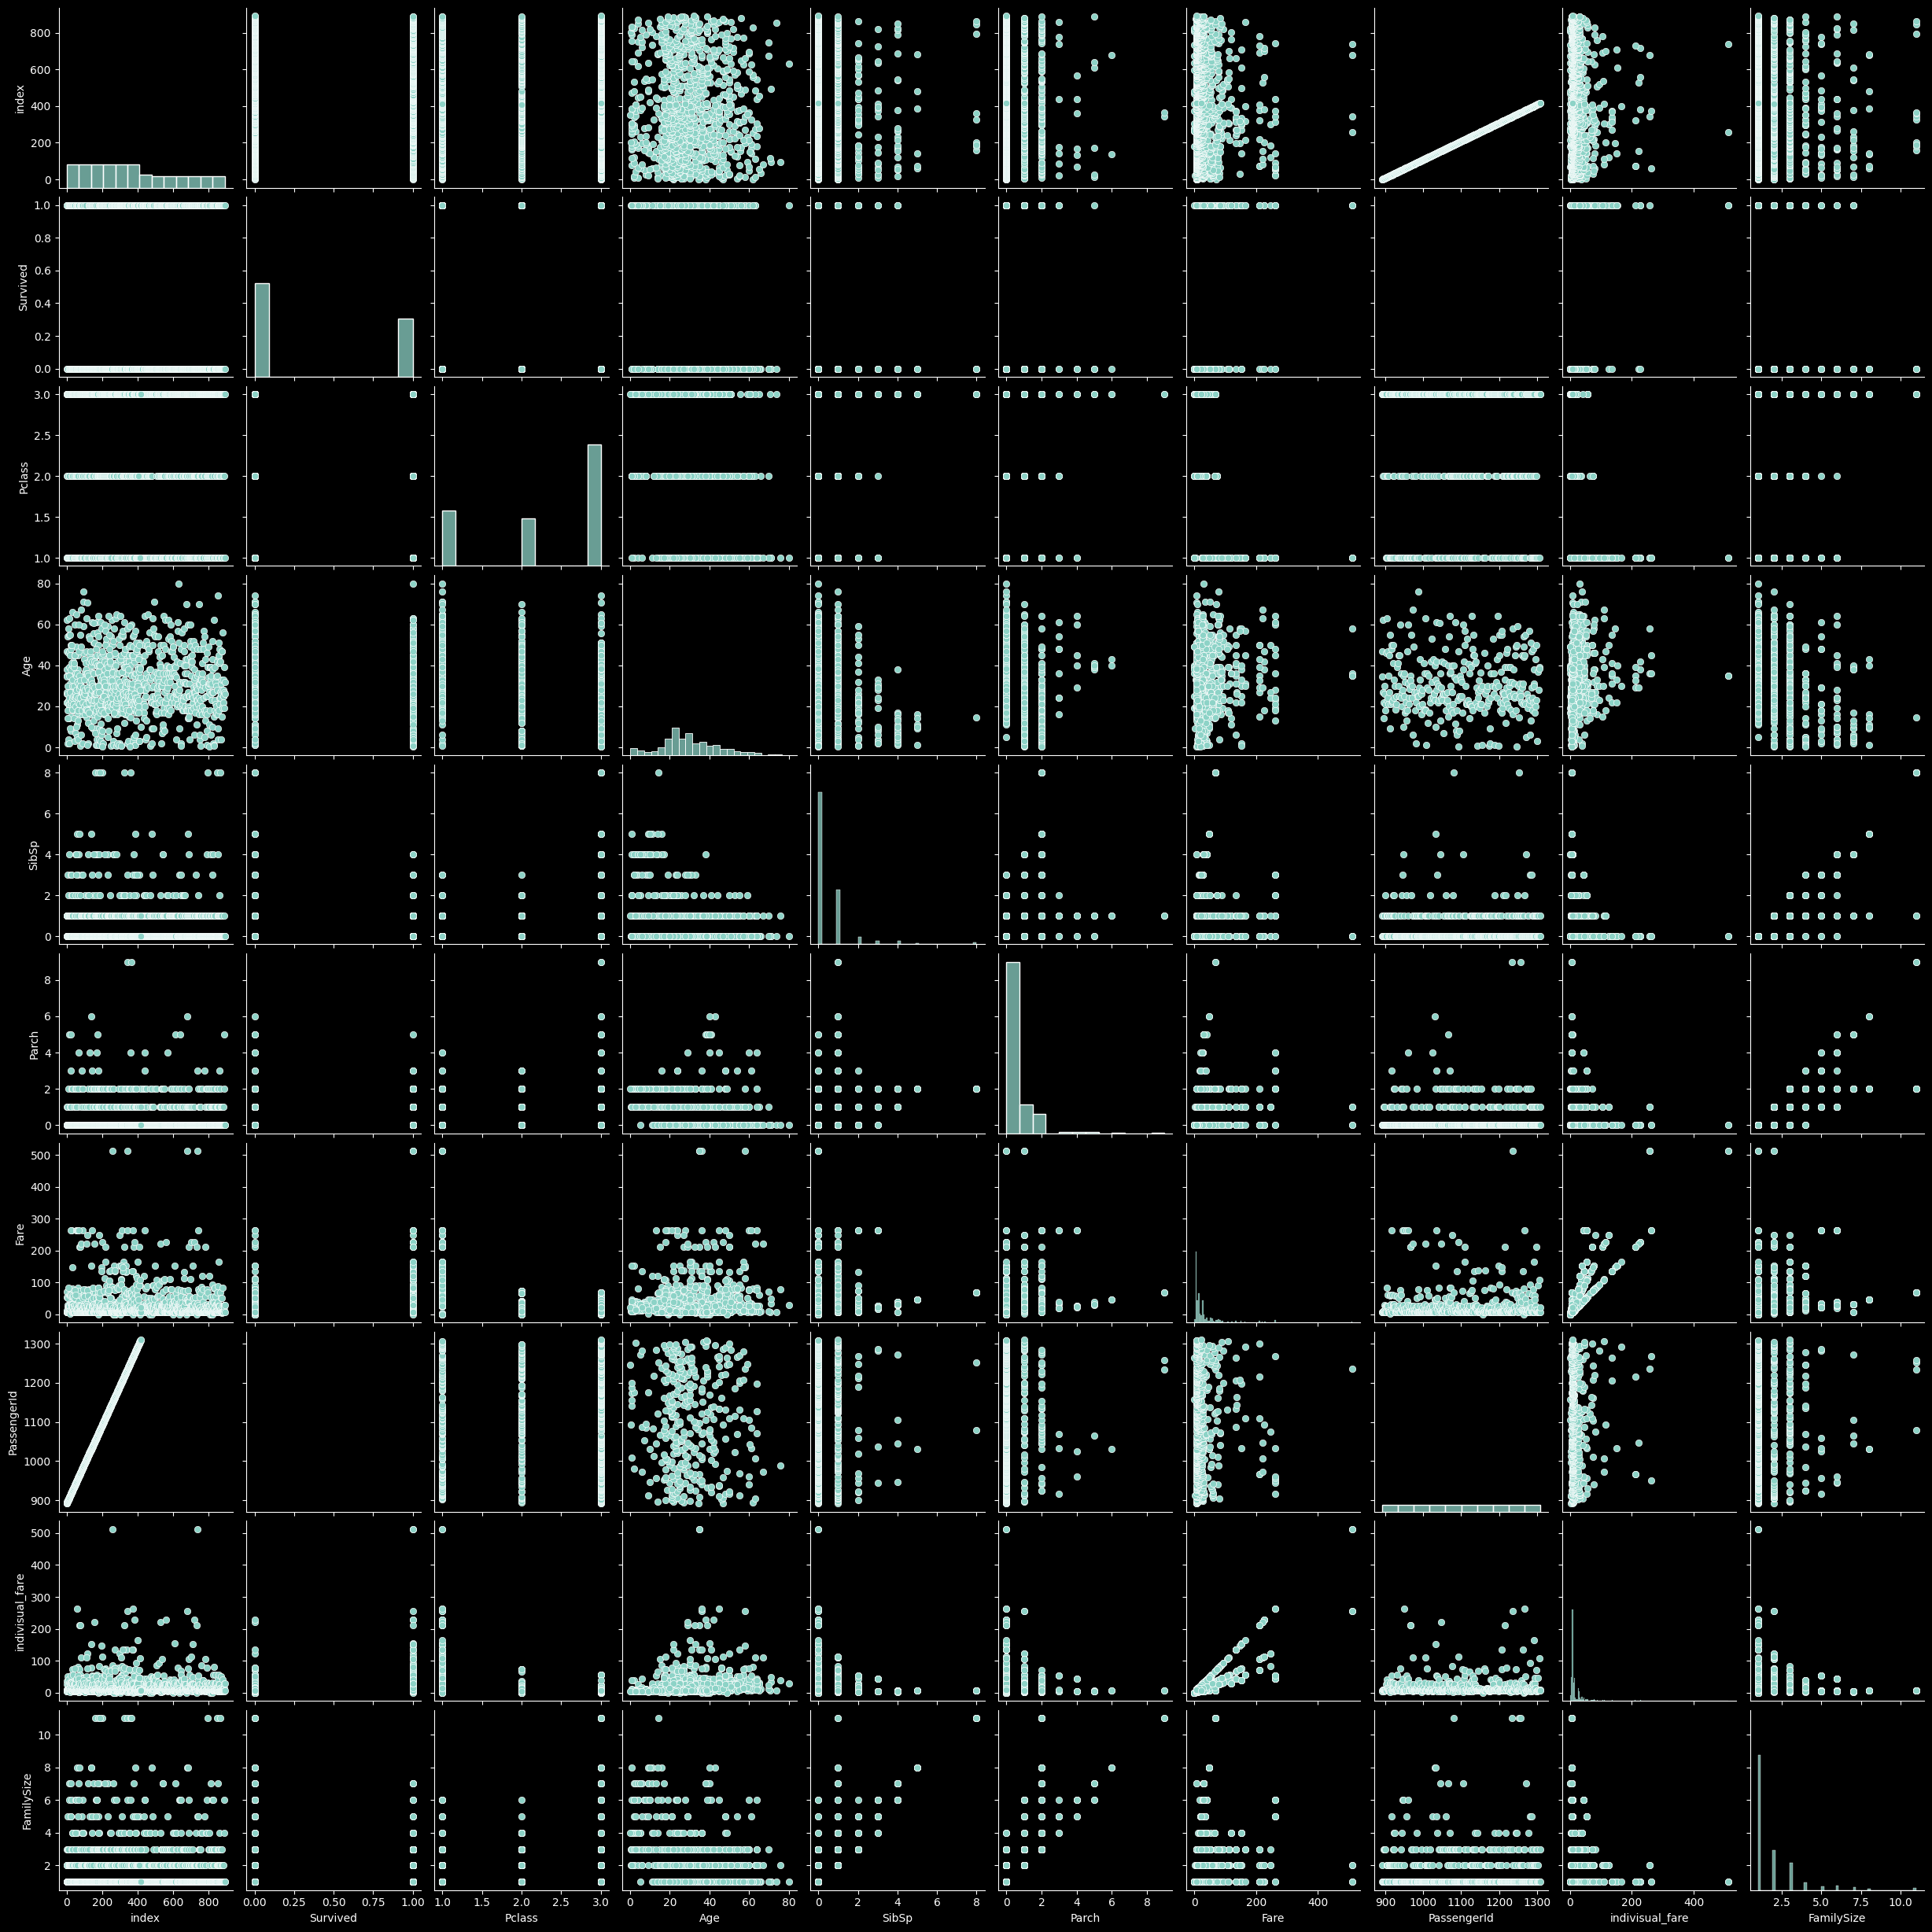

In [345]:
# Check for duplicate indices in each column
for col in df.columns:
    if not df.index.is_unique:
        print(f"Column '{col}' has duplicate indices.")

# If duplicate indices are found, you can reset the index:
df = df.reset_index()

# Now try the pairplot again
sns.pairplot(df)

Completing an exploratory data analysis (EDA) on a dataset like the Titanic dataset can be both enlightening and insightful. Here's a potential closure line for your analysis:

"In conclusion, delving into the Titanic dataset through exploratory data analysis has provided valuable insights into the demographics and factors influencing survival rates aboard the ill-fated ship. From understanding the distribution of passenger ages, classes, and embarkation points to exploring the relationships between survival and various factors such as gender and family size, this analysis has shed light on the human stories within this historical tragedy. EDA serves not only to understand the past but also to inform and guide future inquiries, making it an indispensable tool in uncovering patterns and narratives hidden within data."



# Thank You